# Coding for Data Science (Day 2)

##เนื้อหา


*   Function
*   Object oriented programming
*   NumPy
*   Matplotlib
*   Seaborn & Pandas

## หัวข้อที่ 1: ฟังก์ชัน

- ในบางครั้งเราจำเป็นต้องทำกระบวนการบางอย่างซ้ำๆ กัน แต่ว่าเปลี่ยนค่าตัวแปรที่ควบคุมกระบวนการ (ซึ่งเรียกว่า *พารามิเตอร์* – parameter) เหล่านั้นไปตามสถานการณ์ ทำให้เราต้องก็อปปี้แปะโค้ดและแก้โค้ดซ้ำไปซ้ำมา

- การกระทำดังกล่าวอาจก่อข้อผิดพลาด (bug) ได้ในภายหลัง
  - หากเราต้องแก้ไขกระบวนการหนึ่งจุด เราจะต้องไล่ตามไปแก้ไขทุกจุดที่เราก็อปปี้แปะเอาไว้ให้หมด ไม่เช่นนั้นโปรแกรมก็จะทำงานไม่เหมือนกัน ปัญหานี้เรียกว่า *ปัญหาความไม่เป็นหน่วยเดียวกัน* (modularity issue)
  - กระบวนการที่เราก็อปปี้แปะมานั้น มักจะต่อยาวกันเป็นพรืด หากมาอ่านโค้ดเองในภายหลัง ก็อาจจะลืมไปแล้วว่าโค้ดส่วนนี้ทำหน้าที่อะไร ปัญหานี้เรียกว่า *ปัญหาการอ่านโค้ดไม่ออก* (code readability issue)
  - การก็อปปี้แปะโค้ดซ้ำไปซ้ำมา ทำให้ไม่สามารถเรียกตัวเองซ้ำแบบเวียนเกิดได้ ปัญหานี้เรียกว่า *ปัญหาการเรียกตัวเองซ้ำ* (self-callability issue)
  
- เพื่อแก้ปัญหาดังกล่าว เราจะนำกระบวนการที่ต้องทำซ้ำๆ แต่เปลี่ยนค่าตัวแปรที่ควบคุมกระบวนการเหล่านั้น มารวมกลุ่มเป็น<u>**ฟังก์ชัน**</u> (function)

### การนิยามฟังก์ชัน

- เราสามารถนิยามฟังก์ชันได้ด้วยคำสั่ง `def` (ย่อมาจากคำว่า define) ดังนี้ครับ
```python
    def <ชื่อฟังก์ชัน> ( <รายการพารามิเตอร์> ) :
        <กระบวนการ>
```

- เช่น เราสามารถนิยามฟังก์ชันสำหรับรับพารามิเตอร์ ได้แก่ ชื่อนักเรียน อายุ และความสูง แล้วแสดงผลออกหน้าจอ ได้ดังนี้

In [2]:
def print_student(name, age, height):
    print(f'Name   : {name}')
    print(f'Age    : {age:d} y/o')
    print(f'Height : {height:6.2f} cm')
    print()

- เมื่อเรานิยามฟังก์ชันแล้ว เราก็สามารถเรียกฟังก์ชันนั้นได้

In [3]:
student_scores = [
    ['John', 13, 165.5], ['Mary', 14, 173.0], ['Cindy', 12, 163.5]
]

for name, age, height in student_scores:
    print_student(name, age, height)

Name   : John
Age    : 13 y/o
Height : 165.50 cm

Name   : Mary
Age    : 14 y/o
Height : 173.00 cm

Name   : Cindy
Age    : 12 y/o
Height : 163.50 cm



### การคืนค่าจากฟังก์ชันด้วยคำสั่ง `return`

- นอกจากฟังก์ชันจะรวบรวมกระบวนการให้เป็นหน่วยเดียวได้แล้ว เรายังสามารถกำหนดให้ฟังก์ชันทำการคำนวณบางอย่างในกระบวนการ แล้วคืนค่าผลลัพธ์กลับออกมาได้อีกด้วย

- เราสามารถสั่งให้ฟังก์ชันหยุดการทำงานและคืนค่ากลับออกมาได้ด้วยคำสั่ง `return` โดยมีรูปแบบคือ
```python
    return <ค่าที่คืนกลับไป>
```

- เช่น เราสามารถเขียนฟังก์ชันให้คำนวณค่าเฉลี่ย (average) ของสมาชิกในลิสต์ แล้วคืนค่าเฉลี่ยนั้นกลับออกไปได้ดังนี้

In [1]:
def average(items):
    my_sum = 0.0
    for item in items:
        my_sum = my_sum + item
    return my_sum / len(items)

- เราสามารถนำค่าที่ฟังก์ชันคืนกลับออกมาไปใช้ต่อได้ทันที

In [4]:
student_heights = [163.5, 150.0, 167.0, 161.25, 170.0]

avg = average(student_heights)

print(f'The average of student heights is {avg:8.2f}.')

The average of student heights is   162.35.


### แบบฝึกหัด 1.1


ค่าความแปรปรวน (variance) เป็นมาตรวัดทางสถิติเพื่อบอกว่า ข้อมูลของเรากระจัดกระจายมากแค่ไหน โดยเทียบจากผลรวมของ*ระยะห่าง*ระหว่างข้อมูลแต่ละตัวกับค่าเฉลี่ย ระยะห่างตัวนี้คำนวณได้จากการนำข้อมูลกับค่าเฉลี่ยมาลบกันแล้วยกกำลัง 2 นั่นเอง

จงนิยามฟังก์ชันที่คำนวณค่าความแปรปรวนของข้อมูล $x_1, x_2, x_3, \ldots, x_N$ ซึ่งการคำนวณจะเป็นไปตามสูตรต่อไปนี้

$$
\begin{eqnarray}
\mathrm{Var}(x_1, x_2, x_3, \ldots, x_N) & = & \frac{1}{N - 1} \sum_{k = 1}^{N} \left( x_k - \bar{x} \right)^2
\end{eqnarray}
$$

เมื่อ $\bar{x}$ คือค่าเฉลี่ยของข้อมูล ซึ่งสามารถคำนวณได้จากฟังก์ชัน `average`

<u>**คำเตือน:**</u> เมื่อคำนวณค่าความแปรปรวนได้แล้ว อย่าลืมใช้คำสั่ง `return` เพื่อคืนผลลัพธ์ออกไปด้วยนะครับ

In [5]:
# ฟังก์ชันสำหรับคำนวณค่าเฉลี่ย
def average(items):
    my_sum = 0.0
    for item in items:
        my_sum = my_sum + item
    return my_sum / len(items)

# ฟังก์ชันสำหรับคำนวณค่าความแปรปรวน
def variance(items):
    my_ave = average(items)
    my_sum = 0.0
    for item in items:
        my_sum += (item - my_ave)**2 #same meaning >> my_sum=my_sum+(item-my_ave)**2
    return my_sum/(len(items)-1)

เมื่อเขียนโปรแกรมเสร็จแล้ว ท่านสามารถทดสอบโปรแกรมได้ตรงนี้

In [6]:
student_heights = [163.5, 150.0, 167.0, 161.25, 170.0]

avg = average(student_heights)
var = variance(student_heights)

print(f'The average of student heights is {avg:8.2f}.')
print(f'The variance of student heights is {var:8.2f}.')

#หากโปรแกรมทำงานถูกต้อง
#The average of student heights is   162.35.
#The variance of student heights is    58.80.

The average of student heights is   162.35.
The variance of student heights is    58.80.


### การหยุดการทำงานของฟังก์ชันด้วยคำสั่ง `return`

- เราสามารถหยุดการทำงานของฟังก์ชันกลางคันได้ ด้วยคำสั่ง `return` โดยโปรแกรมจะออกจากฟังก์ชันทันที

- จริงๆ แล้วในคำสั่ง `return` นี้เราอาจจะใส่ค่าที่คืนกลับไปก็ได้ หรือไม่ใส่ลงไปก็ได้
  - หากไม่ใส่ค่าคืนกลับ โปรแกรมก็เพียงหยุดการทำงานของฟังก์ชัน แล้วย้อนกลับไปที่จุดเดิมที่เรียกฟังก์ชันนั้น
  - แต่ถ้าหากใส่ค่าคืนกลับ โปรแกรมก็จะหยุดการทำงานของฟังก์ชัน แล้วย้อนกลับไปที่จุดเดิมพร้อมกับใส่ค่าคืนกลับที่ตำแหน่งของฟังก์ชันนั้น

- เรามาลองสังเกตฟังก์ชันดังต่อไปนี้กัน ฟังก์ชันนี้จะคำนวณค่า factorial ของจำนวนเต็ม $ n $ ซึ่งแทนด้วยสัญลักษณ์ $ n! $ โดยสูตรการคำนวณจะเป็นดังนี้

$$
\begin{eqnarray}
0! & = & 1 \\
1! & = & 1 \\
n! & = & 1 \times 2 \times 3 \times \ldots \times n \qquad \textrm{เมื่อ $n > 1$}
\end{eqnarray}
$$

- หากเราใส่พารามิเตอร์ `n` เป็น 0 หรือ 1 ฟังก์ชันนี้จะคืนค่า 1 ออกไปแล้วหยุดทำงานทันที

In [7]:
# คำนวณค่า factorial ของจำนวนเต็ม n
def factorial(n):

    # หากค่า n เป็น 0 หรือ 1
    if n in [0, 1]:
        # ให้คืนค่า 1 กลับไป แล้วหยุดการทำงานทันที
        return 1

    # วนลูปคูณเลข
    result = 1.0
    for i in range(2, n + 1):
        result = result * i

    # คืนผลลัพธ์กลับออกไป
    return result

- เรามาลองทดสอบฟังก์ชัน `factorial` กัน

In [8]:
print(factorial(0))
print(factorial(20))

1
2.43290200817664e+18


- ในกรณีที่ฟังก์ชันเป็นเพียงการรวบรวมกระบวนการให้เป็นหน่วย ไม่ได้มีจุดประสงค์จะคืนค่ากลับออกไป เราก็ยังสามารถใช้คำสั่ง `return` ได้ด้วย เพียงแต่เราไม่ต้องระบุค่าคืนกลับเท่านั้นเอง

- ในฟังก์ชันด้านล่างนี้ ถ้าหากพารามิเตอร์ `age` มีค่า 60 ขึ้นไป ฟังก์ชันจะพิมพ์ข้อความ `--Senior--` แล้วจบการทำงานทันที

In [ ]:
def print_student(name, age, height):

    # หาก age มีค่า 60 ขึ้นไป
    if age >= 60:
        print('--Senior--')
        print()

        # หยุดการทำงานของฟังก์ชัน
        return

    print(f'Name   : {name}')
    print(f'Age    : {age:d} y/o')
    print(f'Height : {height:6.2f} cm')
    print()

In [ ]:
student_scores = [
    ['John', 13, 165.5], ['Mary', 14, 173.0], ['Cindy', 12, 163.5],
    ['Magdalene', 65, 165.5], ['Eugene', 15, 177.0], ['Rupert', 12, 153.5]
]

for name, age, height in student_scores:
    print_student(name, age, height)

### แลมบ์ดาฟังก์ชัน (Lambda function)

- แลมบ์ดาฟังก์ชัน หรือ แลมบ์ดาเอ็กเพรสชั่น (Lambda Expression) คืองก์ชันขนาดเล็ก ที่สามารถมีได้เพียงเอ็กเพรสชั่นเดียวเท่านั้น
- เราสามารถใช้คำสั่ง `lambda` ในการสร้างแลมบ์ดาฟังก์ชันได้
- และค่าที่แลมบ์ดาฟังก์ชัน `return` จะเป็นผลลัพธ์ของเอ็กเพรสชั่นของฟังก์ชัน เช่น

In [ ]:
f = lambda x: x + 1
print(f(2))
print(f(8))

In [ ]:
g = lambda a, b: (a + b) / 2
print(g(3, 5))
print(g(10, 33))

- แลมบ์ดาฟังก์ชันจะมีประโยชน์มากเมื่อนำมาใช้กับฟังก์ชัน `filter()` หรือฟังก์ชัน `map()`


- เมื่อ `filter()` คือฟังก์ชันที่สร้างลิสต์ที่ฟังก์ชันภายในคืนค่า `true` โดยมีรูปแบบการใช้งานดังนี้
```
return_lis = list(filter(<ฟังก์ชันที่ใช้ตรวจสอบ>, <ลิสต์ของข้อมูล>))
```
เช่น

In [ ]:
def oddNumber(x):
  return x%2 != 0

my_number = [0,1,2,3,4,5]
print(list(filter(oddNumber,my_number)))

- หากเราใช้แลมบ์ดาฟังก์ชัน จะสามารถเขียนได้ใหม่เป็น

In [ ]:
my_number = [0,1,2,3,4,5]
print(list(filter(lambda x: x%2 != 0,my_number)))

- เมื่อ `map()` คือฟังก์ชันที่นำสมาชิกทุกตัวในลิสต์ไปกระทำโดยฟังก์ชันภายในโดยมีรูปแบบการใช้งานดังนี้
```
return_lis = list(map(<ฟังก์ชันที่จะกระทำ>, <ลิสต์ของข้อมูล>))
```
เช่น

In [ ]:
def power2(x):
  return x**2

my_number = [0,1,2,3,4,5]
print(list(map(power2,my_number)))

- หากเราใช้แลมบ์ดาฟังก์ชัน จะสามารถเขียนได้ใหม่เป็น

In [ ]:
my_number = [0,1,2,3,4,5]
print(list(map(lambda x: x**2,my_number)))

### การใช้งาน list comprehension

- list comprehension คือการสร้าง List ใหม่จาก List เดิมที่มี
- เราสามารถใช้งาน list comprehension ในการทำงานคล้ายกับ map function ได้ ตัวอย่างเช่น

In [ ]:
old_list = [0, 2, 4, 6]
new_list = [x+2 for x in old_list]
print('my old list',old_list)
print('my new list',new_list)

- นอกจากนี้ เรายังสามารถใช้ list comprehension ในการทำงานคล้ายกับ filter function ได้ ตัวอย่างเช่น

In [10]:
items = [0, 1, 2, 3, 4, 5]

new_items = [x for x in items if x%2 == 0]

#Normal way as below;
'''
new_items = []
for item in items:
    if item%2 == 0:
        new_items.append(item)
'''

print(new_items)

[0, 2, 4]


- หรือเรายังสามารถใช้ list comprehension ในการทำงาน map และ filter ในกระบวนการเดียวได้อีกด้วย เช่น

In [ ]:
items = [0, 1, 2, 3, 4, 5]
new_items = [x**2 for x in items if x%2 == 0]
print(new_items)

### แบบฝึกหัด 1.2

จงเขียนโปรแกรมเพื่อคำนวณค่ารากที่สองของข้อมูลที่อยู่ในลิสต์ที่เป็นจำนวนคู่ โดยโปรแกรมจะต้องเขียนอยู่ในฟังก์ชัน `print()` เท่านั้น

In [16]:
number_list = [2, 15, 5, 7, 10, 3, 28, 30]

new_items = [x for x in number_list if x%2 ==0]
new_list = [x**(1/2) for x in number_list if x%2 ==0]

print(new_items)
print(new_list)

[2, 10, 28, 30]
[1.4142135623730951, 3.1622776601683795, 5.291502622129181, 5.477225575051661]


### แบบฝึกหัด 1.3

จงเขียนโปรแกรมที่คำนวณตัวเลข Fibonacci $ F(n) $ ซึ่งเป็นตามนิยามต่อไปนี้
$$
\begin{eqnarray}
    F(n) & = &
    \begin{cases}
        F(n - 1) + F(n - 2) & \textrm{เมื่อ } n \geq 2 \\
        n & \textrm{มิฉะนั้น} \\
    \end{cases}
\end{eqnarray}
$$
แล้วทดลองพิมพ์ค่าของ $F(5)$ ออกมา


In [15]:
def F(n):
    if n>=2:
        return F(n-1) + F(n-2)
    else:
        return n

print(F(8))

21


Fibonacci

https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Fibonacci_Spiral.svg/1920px-Fibonacci_Spiral.svg.png


https://en.wikipedia.org/wiki/Fibonacci_sequence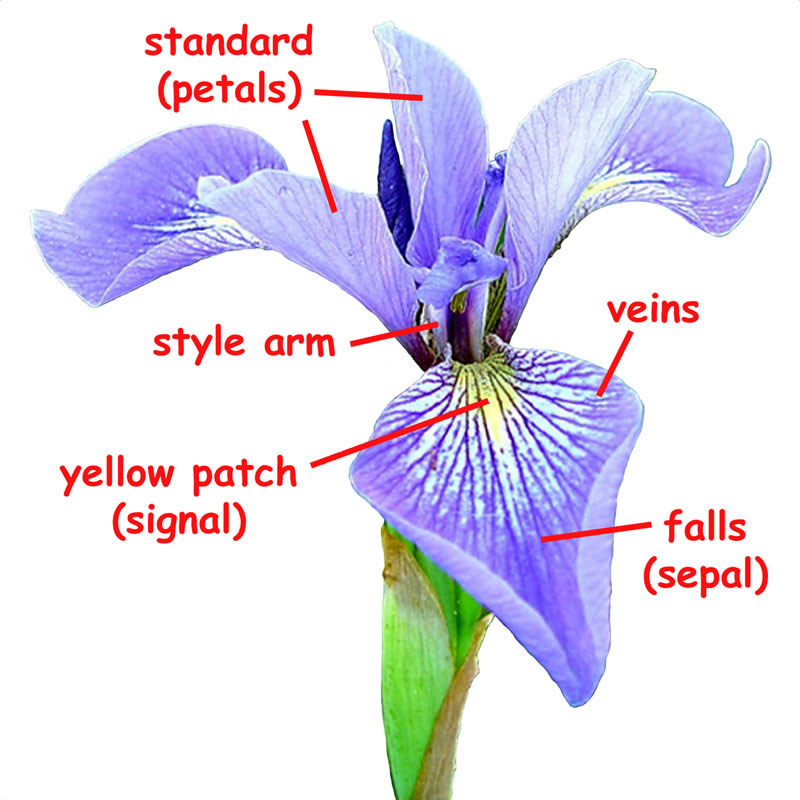

In [17]:
# eg. Factorial (recursive function)

def fac(n):
    if n<=1:
        return 1
    else:
        return n*fac(n-1)

print(fac(3))

print(fac(5))

6
120


- ฟังก์ชันที่เราเขียนใน แบบฝึกหัด 1.3 เราเรียกว่า ฟังก์ชันเวียนเกิด (Recursive function)
- ซึ่งฟังก์ชันดังกล่าวจะประกอบด้วย 2 ส้วนหลักๆ คือ
 - กรณีเวียนเกิด (Recursion case) เป็นกรณีที่ฟังก์ชันจะคืนค่าที่เกิดจากการเรียกใช้ฟังก์ชันตัวเอง
 - กรณีฐาน (Base case) เป็นกรณีสิ้นสุดการเวียนเกิด ซึ่งฟังก์ชันจะทำการคืนค่าคงที่ออกมาก

## หัวข้อที่ 2: การโปรแกรมเชิงวัตถุ


- ในกิจกรรมที่แล้ว เราได้เรียนรู้การรวบรวมกระบวนการให้เป็นหน่วยด้วยฟังก์ชัน นั่นคือเราพยายามออกแบบโปรแกรมโดยเน้นที่กระบวนการของการกระทำ

- แต่ในบางกรณี การออกแบบโปรแกรมโดยเน้นกระบวนการอาจจะทำให้การเขียนโปรแกรมยุ่งยากมากขึ้น

- เช่น เราต้องการเขียนโปรแกรมเพื่อจัดการกับรูปทรงต่างๆ เช่น สามเหลี่ยม สี่เหลี่ยมจัตุรัส ฯลฯ โดยมีการกระทำดังต่อไปนี้
  1. หาพื้นที่ได้
  2. หาเส้นรอบวงได้
  3. หาสีของรูปทรงได้
  4. เปลี่ยนข้อมูลจำเพาะของรูปทรงได้ เช่น รัศมี ความกว้าง ความยาว ฯลฯ
  5. เปลี่ยนสีของรูปทรงได้
  
- ถ้าเราเขียนโปรแกรมด้วยฟังก์ชันทั้งหมด เราจะเขียนโปรแกรมได้ดังนี้

In [ ]:
pi = 3.1415926

# คำนวณพื้นที่วงกลม
def area_circle(circle):
    return pi * circle['radius']**2

# คำนวณเส้นรอบวงของวงกลม
def circumference_circle(circle):
    return 2 * pi * circle['radius']

# หาค่าสีของวงกลม
def color_circle(circle):
    return circle['color']

# คำนวณพื้นที่จัตุรัส
def area_square(square):
    return square['side']**2

# คำนวณเส้นรอบวงจัตุรัส
def circumference_square(square):
    return 4 * square['side']

# หาค่าสีของจัตุรัส
def color_square(square):
    return square['color']


- จะสังเกตได้ว่า เรายังต้องเขียนฟังก์ชันซ้ำกันอยู่หลายอัน แม้ว่าฟังก์ชันเหล่านี้จะทำงานคล้ายคลึงกันก็ตาม เช่น `color_circle` กับ `color_square`

### คลาส (class)

- เพื่อให้อ่านโค้ดได้ง่ายขึ้น เรายังสามารถรวบรวมกระบวนการตามชนิดของวัตถุได้อีกด้วย โดยวัตถุแต่ละชนิดจะมีฟังก์ชันหน้าตาเหมือนกัน แต่ไส้ในของแต่ละฟังก์ชันจะแตกต่างกันไปตามชนิดของวัตถุ

- การรวบรวมกระบวนการตามชนิดของวัตถุนี้ เราเรียกว่า **การโปรแกรมเชิงวัตถุ** (object-oriented programming หรือ OOP)

- ในภาษา Python เราสามารถสร้างวัตถุชนิดใหม่ได้ด้วยคำสั่ง `class` ดังรูปแบบต่อไปนี้
```python
    class <ชื่อคลาส> :
        <รายการฟังก์ชัน>
```

- เราสามารถนิยามฟังก์ชันภายในคลาสได้ด้วยคำสั่ง `def` เหมือนกับฟังก์ชันปกติ แต่ฟังก์ชันภายในคลาสนี้มีชื่อเรียกอย่างเป็นทางการว่า **เมธอด** (method)

- เมธอดสำคัญของคลาสคือ **คอนสตรักเตอร์** (constructor) มีไว้สำหรับสร้างวัตถุ (object) จากคลาส โดยคอนสตรักเตอร์จะใช้ชื่อเมธอดว่า `__init__` (โปรดสังเกตว่าชื่อ `init` จะมีขีดเส้นใต้ 2 อันที่ด้านหน้าและด้านหลัง)

- คอนสตรักเตอร์จะรับพารามิเตอร์ 2 ชุด
  - `self` สำหรับอ้างถึงวัตถุที่เรากำลังจะสร้าง
  - พารามิเตอร์ที่จะใส่ในวัตถุนั้น
  
- เช่น เราสามารถนิยามคลาส `Circle` และคอนสตรักเตอร์ของคลาสนี้ได้ดังนี้

In [ ]:
class Circle:

    def __init__(self, color, radius):
        self.color = color
        self.radius = radius

- คอนสตรักเตอร์ของคลาส `Circle` จะรับพารามิเตอร์สำหรับคลาส 2 ตัวคือ `color` และ `radius`

- เมื่อเรารับพารามิเตอร์เหล่านี้มาแล้ว เราก็จะนำมาใส่เป็น**คุณสมบัติ** (property) ของคลาส โดยเราจะกำหนดคุณสมบัติของคลาสด้วยการอ้างถึงตัวแปร `self` เช่น
```python
    def __init__(self, color, radius):
        self.color = color
        self.radius = radius
```

- นอกจากนี้เรายังสามารถนิยามเมธอดอื่นๆ สำหรับวัตถุของคลาส `Circle` ได้อีกด้วย ในตัวอย่างข้างล่างนี่ เราจะนิยามฟังก์ชันเพิ่มอีก 3 ตัว ได้แก่ `area`, `circumference`, และ `get_color`

In [ ]:
pi = 3.1415926

class Circle:

    # คอนสตรักเตอร์
    def __init__(self, color, radius):

        # กำหนดสีจากพารามิเตอร์
        self.color = color

        # กำหนดรัศมีจากพารามิเตอร์
        self.radius = radius

    # คำนวณพื้นที่
    def area(self):
        return pi * self.radius**2

    # คำนวณเส้นรอบวง
    def circumference(self):
        return 2 * pi * self.radius

    # หาค่าสี
    def get_color(self):
        return self.color

- เราสามารถประกาศวัตถุของคลาสได้โดยเรียกชื่อคลาส ตามด้วยพารามิเตอร์ในคอนสตรักเตอร์

- ในตัวอย่างด้านล่างนี้ เราประกาศวัตถุของคลาส `Circle` ออกมา 3 ตัว

- จริงๆ แล้วการสร้างคลาสเปรียบเสมือนการสร้างแม่พิมพ์ (template) เพื่อสร้างวัตถุจำนวนมากๆ ที่มีหน้าตาคล้ายคลึงกันออกมา

In [ ]:
circle1 = Circle('red', 30.0)
circle2 = Circle('green', 15.5)
circle3 = Circle('blue', 10.0)

- และเราก็สามารถเรียกเมธอดของวัตถุนี้ได้ตามรูปแบบ `<วัตถุ>.<เมธอด>(<พารามิเตอร์>)`

In [ ]:
print('Area of circle1 =', circle1.area())
print('Circumference of circle2 =', circle2.circumference())
print('Color of circle3 =', circle3.get_color())

### การถ่ายทอดคุณสมบัติของคลาส (Inheritance)

- ข้อดีอีกข้อหนึ่งของการสร้างคลาสก็คือ เราสามารถถ่ายทอดคุณสมบัติของคลาสให้กับคลาสลูกหลานได้อีกด้วย

- เช่น ถ้าเราสังเกตคลาส `Circle` และ `Square` ให้ดี เราจะพบว่าทั้งสองคลาสนี้มีคุณสมบัติร่วมกันคือ มี `color` (สี) เหมือนกัน และมีเมธอดร่วมกันคือ `get_color` (หาค่าสี)

- ที่เป็นเช่นนี้ก็เพราะว่า จริงๆ แล้วคลาส `Circle` (วงกลม) และ `Square` (สี่เหลี่ยมจัตุรัส) ต่างก็เป็นรูปทรงด้วยกันทั้งสิ้น เราจึงมองได้ว่าทั้งสองคลาสนี้เป็นคลาสลูกของคลาส `Shape` ด้วยกันทั้งสิ้น

In [ ]:
pi = 3.1415926

class Shape:

    def __init__(self, color):
        self.color = color

    # หาค่าสี
    def get_color(self):
        return self.color

- หากเราต้องการนิยามคลาสใหม่ให้เป็นคลาสลูก เราสามารถใช้คำสั่ง `class` ได้ตามรูปแบบนี้ครับ
```python
    class <คลาสลูก> ( <คลาสแม่> ) :
        <รายการเมธอด>
```

- เมื่อเราประกาศคลาสลูกขึ้นมาแล้ว เราจะต้องนิยามคอนสตรักเตอร์ให้เรียกใช้คอนสตรักเตอร์ของคลาสแม่ด้วย

- วิธีการเรียกใช้คอนสตรักเตอร์ของคลาสแม่คือใช้คำสั่ง `super(<คลาสลูก>, self).__init__(<พารามิเตอร์สำหรับคลาสแม่>)`

- เช่น เราสามารถนิยามคลาส `Circle` ให้เป็นคลาสลูกของ `Shape` ได้ดังนี้

In [ ]:
class Circle(Shape):

    def __init__(self, color, radius):

        # นี่คือวิธีการเรียกคอนสตรักเตอร์ของคลาสแม่ โดยเราจะต้องป้อนพารามิเตอร์ที่จำเป็นสำหรับคลาสแม่เข้าไปด้วย
        super(Circle, self).__init__(color)

        # หลังจากนั้นให้เรากำหนดคุณสมบัติของคลาสลูกตามปกติ
        self.radius = radius

    # คำนวณพื้นที่
    def area(self):
        return pi * self.radius**2

    # คำนวณเส้นรอบวง
    def circumference(self):
        return 2 * pi * self.radius

- จะสังเกตว่า คราวนี้เราจะไม่ต้องนิยามฟังก์ชัน `get_color` อีกแล้ว เพราะฟังก์ชันนี้ได้รับการถ่ายทอดมาจากคลาส `Shape` อยู่แล้วนั่นเอง

In [ ]:
my_circle = Circle('red', 30.0)
print('Area =', my_circle.area())
print('Circumference =', my_circle.circumference())
print('Color =', my_circle.get_color())

### แบบฝึกหัด 2.1

สมมติว่าเราต้องการออกแบบคลาสสำหรับรีโมทคอนโทรล หน้าที่หลักของรีโมทคอนโทรลคือ เปิด/ปิด อุปกรณ์ไฟฟ้า แต่รีโมทคอนโทรลสำหรับอุปกรณ์ไฟฟ้าแต่ละชนิดก็จะมีหน้าที่เฉพาะแตกต่างกันออกไป เช่น

- รีโมทโทรทัศน์ก็จะมีฟังก์ชันสำหรับเปลี่ยนช่อง เพิ่ม/ลดเสียง และปรับสีและความสว่าง

- ในขณะที่รีโมทแอร์ก็จะมีฟังก์ชันในการลด/เพิ่มอุณหภูมิ และปรับการสวิงใบพัด เป็นต้น

ในโจทย์ข้อนี้ เราจะให้ท่านออกแบบคลาสทั้งหมด 3 คลาสด้วยกัน โดยมีคลาสแม่คือคลาสรีโมทคอนโทรล `RemoteControl` และมีคลาสลูกอีก 2 คลาสคือ คลาสรีโมทโทรทัศน์ `TVRemoteControl` และคลาสรีโมทแอร์ `ACRemoteControl`

#### 2.1.1 คลาสแม่ `RemoteControl`
คลาสแม่สามารถเปิดและปิดสวิตช์ได้ โดยจะสลับค่าของคุณสมบัติ `power`

In [ ]:
class RemoteControl:

    def __init__(self):

        # ปิดสวิตช์ของอุปกรณ์ไฟฟ้าไว้ก่อน
        self.power = False

    # สลับสวิตช์เปิด/ปิด
    def toggle_power(self):

        print(f'Toggle power: {self.power} -> ', end='')

        # สลับค่าของคุณสมบัติ power (คำใบ้: คำสั่ง not)
        __________

        print(f'{self.power}')

ทดสอบกันนิดนึงว่า คลาสนี้ใช้ได้หรือเปล่า

In [ ]:
rctrl = RemoteControl()

# ค่าสวิตช์ควรจะสลับไปสลับมา
rctrl.toggle_power()
rctrl.toggle_power()
rctrl.toggle_power()

#### 2.1.2 คลาสลูก `TVRemoteControl`: รีโมทโทรทัศน์
คลาส `TVRemoteControl` จะเปลี่ยนช่องได้ เพิ่มเสียงได้ และลดเสียงได้ โดย

- ช่องจะต้องเป็นจำนวนเต็มตั้งแต่ 1 จนถึง 9

- ระดับเสียงจะมีค่าตั้งแต่ 0 จนถึง 10 หากลดเสียงหรือเพิ่มเสียงจนเกินจากค่านี้ ค่าก็จะไม่เปลี่ยนแปลงอีก

In [ ]:
class TVRemoteControl(RemoteControl):

    def __init__(self):

        # เรียกคอนสตรักเตอร์ของคลาสแม่
        __________

        # กำหนดคุณสมบัติเฉพาะของคลาสลูก
        self.channel = 0
        self.volume = 5

    # เปลี่ยนช่องให้เป็นช่องใหม่ที่กำหนด
    def change_channel(self, new_channel):

        print(f'Change channel: {self.channel} -> ', end='')

        # เปลี่ยนช่อง โดยช่องจะต้องเป็นจำนวนเต็มอยู่ในช่วง 0 ถึง 9 ไม่เช่นนั้นก็จะไม่เปลี่ยนช่อง
        __________

        print(f'{self.channel}')

    # เพิ่มเสียง
    def increase_volume(self):

        print(f'Increase volume: {self.volume} -> ', end='')

        # เพิ่มเสียง โดยค่าระดับเสียงต้องไม่เกิน 10
        __________

        print(f'{self.volume}')

    # ลดเสียง
    def decrease_volume(self):

        print(f'Decrease volume: {self.volume} -> ', end='')

        # ลดเสียง โดยค่าระดับเสียงต้องไม่ต่ำกว่า 0
        __________

        print(f'{self.volume}')

ทดสอบโค้ดกันหน่อย

In [ ]:
tvremote = TVRemoteControl()

# ลองเปลี่ยนช่องตามปกติ
tvremote.change_channel(1)
tvremote.change_channel(2)
print()

# ลองเปลี่ยนช่องที่เป็นไปไม่ได้ ช่องไม่ควรจะเปลี่ยน
tvremote.change_channel(-1)
tvremote.change_channel(11)
print()

# ลองเพิ่มเสียงจนหลุดช่วง ระดับเสียงไม่ควรจะเพิ่มอีก
for i in range(11):
    tvremote.increase_volume()
print()

# ลองลดเสียงไปจนหลุดช่วง ระดับเสียงไม่ควรจะลดอีก
for i in range(11):
    tvremote.decrease_volume()

#### 2.1.3 คลาสลูก `ACRemoteControl`: รีโมทแอร์
คลาส `ACRemoteControl` จะเพิ่มระดับอุณหภูมิได้ ลดระดับอุณหภูมิได้ และเปิด/ปิดการสวิงใบพัดได้ ทั้งนี้อุณหภูมิจะต้องอยู่ในช่วง 15-35 องศาเซลเซียสเท่านั้น

In [ ]:
class ACRemoteControl(RemoteControl):

    def __init__(self):

        # เรียกคอนสตรักเตอร์ของคลาสแม่
        __________

        # กำหนดคุณสมบัติเฉพาะของคลาสลูก
        self.temperature = 25
        self.fan_swing = True

    # เพิ่มอุณหภูมิ
    def increase_temperature(self):

        print(f'Increase temperature: {self.temperature} -> ', end='')

        # เพิ่มอุณหภูมิ โดยค่าระดับเสียงต้องไม่เกิน 35
        __________

        print(f'{self.temperature}')

    # ลดอุณหภูมิ
    def decrease_temperature(self):

        print(f'Decrease temperature: {self.temperature} -> ', end='')

        # ลดอุณหภูมิ โดยค่าระดับเสียงต้องไม่ต่ำกว่า 15
        __________

        print(f'{self.temperature}')

    # สลับการเปิด/ปิดสวิงใบพัด
    def toggle_fan_swing(self):

        print(f'Toggle fan swing: {self.fan_swing} -> ', end='')

        # สลับการเปิด/ปิดสวิงใบพัด (คำใบ้: คำสั่ง not)
        # __________

        print(f'{self.fan_swing}')

ลองทดสอบโค้ดด้านบนดู ว่าทำงานได้หรือเปล่า

In [ ]:
acremote = ACRemoteControl()

# ลองสลับสวิตช์การสวิงพัดลม
acremote.toggle_fan_swing()
acremote.toggle_fan_swing()
acremote.toggle_fan_swing()
print()

# ลองเพิ่มอุณหภูมิจนหลุดช่วง ระดับอุณหภูมิไม่ควรจะเพิ่มอีก
for i in range(12):
    acremote.increase_temperature()
print()

# ลองลดอุณหภูมิไปจนหลุดช่วง ระดับอุณหภูมิไม่ควรจะลดอีก
for i in range(12):
    acremote.decrease_temperature()

## หัวข้อที่ 3: NumPy

- NumPy (Numeric Python) เป็นแพคเกจพื้นฐานที่นิยมใช้ในการคำนวณทางวิทยศาสตร์และคณิตศาสตร์
- NumPy มีความสามารถมากมาย จนแทบจะใกล้เคียงกับ MatLab เลยทีเดียว
- เรามักจะใช้ NumPy ในการจัดการข้อมูลประเภทเวกเตอร์และเมทริกซ์
- ก่อนจะใช้งาน NumPy เราจะต้อง **นำเข้า** หรือ **`import`** แพคเกจของ NumPy เข้ามาเสียก่อน โดย

In [ ]:
import numpy

- เราสามารถตั้งชื่อเล่นให้กับการเรียกใช้งานแพคเกจของ NumPy ได้โดยใช้คำสั่ง `as` เช่น

In [ ]:
import numpy as np

- หลังจากเรานำเข้าแพคเกจ NumPy เรียบร้อยแล้ว เราจะสามารถเรียกใช้งานเมธอดของ NumPy ได้ทันที โดยถ้าหากเราตั้งชื่อเล่นให้กับ NumPy เราจะเรียกเมธอดผ่านชื่อเล่นนั้น
```
np.<เมธอด>
```
- เราสามารถใช้ NumPy ในการสร้างตัวแปรที่เก็บข้อมูลของเวกเตอร์ได้ ด้วยเมธอด
```python
import numpy as np
np.array([1,2,5])
```



- โดยนิยามของเวกเตอร์ คือลำดับของตัวเลขที่เขียนอยู่ในรูป

$$ u =  \begin{pmatrix}u_1\\u_2 \\ \vdots \\u_n\end{pmatrix} $$

- ตัวอย่าง เช่น $$ \begin{pmatrix}1\\2\\5 \end{pmatrix},\begin{pmatrix}-6\\3 \end{pmatrix} $$

- ดังนั้น เราอาจกล่าวได้ว่า เวกเตอร์ ก็คือ `array` หนึ่งมิตินั่นเอง

***ข้อควรระวัง:*** array ใน NumPy ต่างจากการใช้ ลิสต์ ตรงที่ ใน array นั้น จะมีข้อมูลได้เพียงชนิดเดียวเท่านั้น ซึ่งโดยทั่วไปแล้ว จะเก็บข้อมูลจำนวนเต็ม `(int)` หรือจำนวนจริง `(float)`

In [ ]:
import numpy as np

a = np.array([0,1,2,3])   # เวกเตอร์
b = np.array([4,5,6,7])   # อันนี้ก็ เวกเตอร์
print(a)
print(b)

- เราสามารถสร้าง `array` ที่มีขนาดมากกว่าหนึ่งมิติได้
- โดย `array` สองมิติ ก็คือ เมทริดซ์นั่นเอง
- นิยามของเมทริกซ์คือ
$$ A = \begin{pmatrix} a_{1,1}&a_{1,2}& \cdots &a_{1,n}\\
a_{2,1}&a_{2,2}& \cdots &a_{2,n}\\
\vdots&\vdots& \ddots &\vdots\\
a_{n,1}&a_{n,2}& \cdots &a_{n,n}\\
\end{pmatrix} $$

- สำหรับการสร้าง `array` 2 มิติ หรือ เมทริกซ์นั้น เราสามารถทำได้โดย

In [ ]:
import numpy as np
c = np.array([[0,1,2,3],[4,5,6,7]])
print(c)

- การเข้าถึงสมาชิกแต่ละตัวภายใน `NumPy array` เราสามารถทำได้โดยอ้างอิงจาก `index` คล้ายกับลิสต์ เช่น

In [ ]:
print(a[0])
print(b[:2])
print(b[1:])
print(c[1,1])
print(c[1,:])

- นอกจากนี้ เรายังสามารถสร้างเมทริกซ์ ที่สมาชิกทุกตัวเป็น `0` ได้อีกด้วย
- เช่น ในโปรแกรมด้านล่าง เรากำลังจะสร้างเมทริกซ์ที่สมาชิกทุกตัวเป็นเลข `0` โดยมีขนาด 2 แถว 4 หลัก

In [ ]:
import numpy as np
z = np.zeros((2,4))
print(z)

- โดยของที่ใส่อยู่ด้านในวงเล็บ เราเรียกว่า ทูเพิล `(tuple)` โดยทูเพิงนั้นจะมีลักษณะคล้ายลิสต์ ต่างกันที่ที่ใช้วงเล็บ `()` ซึ่งลิสต์จะใช้ `[]` และทูเพิล*ไม่* สามารถทำการแก้ไขค่าภายหลังได้
- นอกจากการสร้างเมทริกซ์ที่สมาชิกทุกตัวเป็นเลข 0 แล้วนั้น เรายังสามารถกำหนดให้สมาชิกทุกตัวเป็นเลขอื่นได้ด้วยโดย

```python
matrix = np.full(<ทูเพิลขนาดของเมทริกซ์>,<เลขที่ต้องการเติม>)
```


In [ ]:
import numpy as np
matrix = np.full((3,4),5)
print(matrix)

- ทั้งนี้ เรายังสามารถสร้างเมทริกซ์ที่สมาชิกทุกตัวเกิดจากการสุ่มได้ด้วย

In [ ]:
import numpy as np
a = np.random.rand(2,2)   # สุ่มตามขนาดที่กำหนด
print(a)
b = np.random.randn(3,3)  # สุ่มตามขนาดที่กำหนด ด้วยการกระจายแบบปกติ
print(b)
c = np.random.randint(0,10,(2,2)) #สุ่มจำนวนเต็ม ค่าตั้งแต่ 0-9 ตามขนาดที่กำหนก
print(c)

- ในบางกรณี เราอาจจำเป็นต้องใช้ **เมทริกซ์เอกลักษณ์** (Identity matrix) ซึ่งเมทริกซ์เอกลักษณ์คือเมทริกซ์จตุรัสที่สมาชิกทุกตัวเป็น 0 ยกเว้นสมาชิกในแนวทะแยงมุม จะมีค่าเป็น 1 เช่น
$$ identity{\_}matrix = \begin{pmatrix} 1&0&\cdots&0\\0&1&\cdots&0\\ \vdots&\vdots&\ddots &\vdots \\0&0&0&1\end{pmatrix} $$
- เราสามารถสร้างเมทริกซ์เอกลักษณ์โดยใช้ `NumPy array` ได้ดังนี้

In [ ]:
import numpy as np
identity = np.identity(5)
print(identity)

- ในการคำนวณทางคณิตศาสตร์ ขนาด และรูปร่างของเวกเตอร์/เมทริกซ์มีความสำคัญต่อการคำนวณ
- เราสามารถแสดงจำนวนมิติ และรูปร่างของ `NumPy array` ได้โดย
- แสดงจำนวนมิติของ `array`
```
<ตัวแปร array>.ndim
```

- แสดงรูปร่างของ `array`
```
<ตัวแปร array>.shape
```



In [ ]:
print('dimension of a',a.ndim)
print('shape of a',a.shape)
print('dimension of b',b.ndim)
print('shape of b',b.shape)
print('dimension of c',c.ndim)
print('shape of c',c.shape)

###แบบฝึกหัด 3.1


1. จงสร้างเวกเตอร์ที่มีสมาชิกจำนวน 5 ตัว โดยสมาชิกแต่ละตัวได้มาจากการสุมจำนวนเต็ม ระหว่าง 5-9

In [ ]:
import numpy as np

vector = _______
print(vector)

2. จงสร้างเมทริกซ์ขนาด `5x5` โดยสมาชิกทุกตัวเป็นเลข 1 ทั้งหมด

In [ ]:
import numpy as np

matrix = _______
print(matrix)

- โดยทั่วไปแล้ว `NumPy array` จะกำหนดชนิดของข้อมูลที่บรรจุอยู่ใน `array` ให้อัตโนมัติ ขึ้นอยู่กับข้อมูลใน `array` นั้น
- อย่างไรก็ตาม เราสามารถกำหนดชนิดของข้อมูลที่อยู่ภายใน `NumPy array` เองได้เช่นกัน โดย
```
matrix = np.array(<list>, <dtype>)
```

In [ ]:
import numpy as np

matrix = np.array([1,2,3], float)
print(matrix)

- จะสังเกตเห็นว่า ถึงแม้ค่าที่เราใส่ในลิสต์เพื่อสร้าง `NumPy array` นั้น จะเป็นจำนวนเต็ม แต่เมื่อเรากำหนดให้ข้อมูลภายใน `NumPy array` เป็นจำนวนจริง `(float)` ข้อมูลใน `matrix` ก็จะมีจุดทศนิยมปรากฏขึ้น

***ข้อควรระวัง*** ในการคำนวณทางคณิตศาสตร์ หากชนิดของข้อมูลใน `NumPy array` ไม่สอดคล้องกัน อาจทำให้โปรแกรมไม่สามารถทำงานได้ จึงควรตรวจสอบให้มั่นใจว่าชนิดของข้อมูลสอดคล้องกัน

#### ตัวกระทำทางคณิตศาสตร์ ด้วย `NumPy array`

- ในหัวข้อลิสต์และลูป หากเราต้องการคำนวณค่าจากสมาชิกในลิสต์ เราจะต้องวนลูปเพื่อเข้าถึงสมาชิกแต่ละตัว
- แต่สำหรับ `NumPy array` เราสามารถใช้ตัวกระทำทางคณิตศาสตร์ได้เลย

In [ ]:
normal_list = [1,2,3,4,5] # หากเป็นลิสต์ทั่วไป
print(normal_list + 3)    # เราไม่สามารถนำมาคำนวณได้โดยตรง โปรแกรมจะเกิดข้อผิดพลาด

In [ ]:
import numpy as np

vect = np.array([1,2,3,4,5]) # หากเป็น NumPy array
print(vect + 3)              # เราสามารถนำมาคำนวณได้เลย

- โดยทั่วไปแล้ว ตัวกระทำทางคณิตศาสตร์ จะดำเนินการกับสมาชิกแต่ละตัวใน `array`
- ตัวกระทำทางคณิตศาสตร์ที่สามารถใช้ได้มีดังต่อไปนี้

|Operator|Description|
|--------|------------|
| +| บวก|
| - |ลบ |
| * | คูณ|
| \ | หาร|
| % | หารเอาเศษ|
| ** | ยกกำลัง|

- เนื่องจากการดำเนินการทางคณิตศาสตร์ จะกระทำกับทุกสมาชิก ดังนั้น ขนาดและรูปร่างของ `NumPy array` จะต้องเท่ากัน

In [ ]:
import numpy as np
a = np.array([[4,4],[6,6]])
b = np.full((2,2),2)
print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a%b)
print(a**b)

- ถ้าหาก `NumPy array` มีขนาดและรูปร่างไม่เท่ากัน แต่มีจำนวนสมาชิกในแถวเท่ากัน
- การดำเนินการทางคณิตศาสตร์ จะถูกกระจายไปแต่ละแถวของ `NumPy array` ตัวที่มีจำนวนแถวมากกว่า เช่น

In [ ]:
import numpy as np
a = np.array([[2,2],[5,5]])
b = np.full((2,),2)
print(a*b)
print(b+a)

***ดังนั้น*** ก่อนดำเนินการใดๆทางคณิตศาสตร์กับตัวแปร `NumPy array` ควรตรวจสอบว่า อย่างน้อย มีจำนวนสมาชิกในแต่ละแถวเท่ากัน

In [ ]:
import numpy as np
a = np.array([1,2])
b = np.array([[1,1,1],[2,2,2]])
print(a + b) # จำนวนสมาชิกในแต่ละแถวไม่เท่ากัน โปรแกรมจะเกิดข้อผิดพลาด

- จะสังเกตเห็นว่า การใช้ตัวดำเนินการ * (คูณ) ข้างต้น เป็นการดำเนินการกับแต่ละสมาชิก ไม่ได้เป็นการคูณเมทริกซ์แต่อย่างใด
- ซึ่งการคูณเมทริกซ์ เราจะได้ผลลัพธ์ที่ต่างออกไป เช่น
$$
\begin{pmatrix}
1&2\\-1&0\\3&2
\end{pmatrix} \times
\begin{pmatrix}
1&5&2\\-2&0&1
\end{pmatrix}
=
\begin{pmatrix}
-3&5&4\\-1&-5&-2\\-1&15&8
\end{pmatrix}
$$
- ในการคูณเมทริกซฺ เราจะใช้ฟังก์ชัน `dot` ใน `NumPy` เข้ามาช่วย เช่น

In [ ]:
import numpy as np
a = np.array([[1,2],[-1,0],[3,2]])
b = np.array([[1,5,2],[-2,0,1]])
print('a = ')
print(a)
print('b = ')
print(b)
print('a x b = ')
print(np.dot(a,b))

###แบบฝึกหัด 3.2

1. สร้างเมทริกซ์
$$
a = \begin{pmatrix}1&2&1\\0&0&0\\-1&-2&-1\end{pmatrix}\\
b = \begin{pmatrix}1&2&1\\2&4&2\\3&6&3\end{pmatrix}\\
c = \begin{pmatrix}4&2&4\end{pmatrix}
$$


In [19]:
import numpy as np
a = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
b = np.array([[1,2,1],[2,4,2],[3,6,3]])
c = np.array([4,2,4])

print('a = ')
print(a)
print('b = ')
print(b)
print('c = ')
print(c)


a = 
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
b = 
[[1 2 1]
 [2 4 2]
 [3 6 3]]
c = 
[4 2 4]


2. หาผลการดำเนินการทางคณิตศาสตร์ $$a+b, a-b, a+c,a-c$$

In [20]:
print('a + b = ')
print(a+b)
print()

print('a - b = ')
print(a-b)
print()

print('a + c = ')
print(a+c)
print()

print('a - c = ')
print(a-c)
print()

a + b = 
[[2 4 2]
 [2 4 2]
 [2 4 2]]

a - b = 
[[ 0  0  0]
 [-2 -4 -2]
 [-4 -8 -4]]

a + c = 
[[5 4 5]
 [4 2 4]
 [3 0 3]]

a - c = 
[[-3  0 -3]
 [-4 -2 -4]
 [-5 -4 -5]]



3. หาผลการคูณแบบเมทริกซ์ ของเมทริกซ์ $a$ และเมทริกซ์ $b$

In [21]:
print(np.dot(a,b))

[[  8  16   8]
 [  0   0   0]
 [ -8 -16  -8]]


4. หาผลรวมของสมาชิกทุกตัวภายในเมทริกซ์ $c$

In [22]:
#General sum for list

'''sum = 0
for i in c:
    sum += c
print(sum)'''

#sum for array in numpy
print(np.sum(c))

10


- จะเห็นว่า หากเราต้องการหาผลรวมของสมาชิกทุกตัวภายใน `NumPy array` เราจะต้องวนลูปเพื่อทำการบวก
- แต่ในความเป็นจริง `NumPy` มีฟังก์ชันที่ช่วยให้เราสามารถหาผลรวมของสมาชิกภายใน `NumPy array` ได้โดยง่าย รวมถึงฟังก์ชันช่วยในการดำเนินการอื่นๆอีกมากมาย ดังตาราง

|ชื่อฟังก์ชัน|รายละเอียด|
|---|---|
|sum|  ผลรวม $(\sum)$ |
|prod| ผลคูณ  $(\prod)$|
|mean| ค่าเฉลี่ย  |
|var| ความแปรปรวน $(\sigma)$  |
|std|  ส่วนเบี่ยงเบนมาตรฐาน $(SD)$  |
|max| ค่ามากที่สุด  |
|argmax|  ตำแหน่งของค่ามากที่สุด |
|min|  ค่าน้อยที่สุด |
|argmin|  ตำแหน่งของค่าน้อยที่สุด |

In [23]:
import numpy as np

a = np.array([2,4,3])

print(f'sum of a = {a.sum()}')
print(f'prod of a = {a.prod()}')
print(f'mean of a = {a.mean()}')
print(f'var of a = {a.var()}')
print(f'std of a = {a.std()}')
print(f'max of a = {a.max()}')
print(f'argmax of a = {a.argmax()}')
print(f'min of a = {a.min()}')
print(f'argmin of a = {a.argmin()}')

sum of a = 9
prod of a = 24
mean of a = 3.0
var of a = 0.6666666666666666
std of a = 0.816496580927726
max of a = 4
argmax of a = 1
min of a = 2
argmin of a = 0


- นอกจากนี้ หาก `NumPy array` มีจำนวนมิติมากกว่าหนึ่ง เราสามารถระบุแกน (axis) ของ `array` ที่เราต้องการได้อีกด้วย
- หากไม่ระบุแกน ฟังก์ชันของ `NumPy` จะทำการหาคำตอบจากทุกสมาชิกใน `array`
- การระบุแกน สามารถทำได้โดย เพิ่ม option เข้าไปในฟังก์ชันของ `NumPy` เช่น
```
<NumPy array>.<function>(axis=<แกนที่ต้องการ>)
```
- โดยแกนจะถูกกำหนดดังนี้
$$
\hspace{1cm}axis = 0\\
\hspace{1cm}\downarrow	\\
axis = 1 \rightarrow\begin{pmatrix}
1&1&1\\
2&2&2\\
3&3&3
\end{pmatrix}
$$

In [25]:
import numpy as np

a = np.array([[1,1,1],[2,2,2],[3,3,3]])
print(f'sum of a in all axis = {a.sum()}')
print(f'sum of a in axis 0 = {a.sum(axis=0)}')
print(f'sum of a in axis 1 = {a.sum(axis=1)}')

sum of a in all axis = 18
sum of a in axis 0 = [6 6 6]
sum of a in axis 1 = [3 6 9]


- สุดท้ายนี้ `NumPy` ยังมีฟังก์ชันสำหรับการดำเนินการทางคณิตศาสตร์ที่เกี่ยวกับเมทริกซ์เพื่อใชำสำหรับการแก้ปัญหาเกี่ยวกับพีชคณิตเชิงเส้น (Linear algebra) อีกด้วย
- โดยการใช้งานจะต้องเรียกผ่านฟังก์ชัน `linalg`
- ซึ่งฟังก์ชันหลักๆ ที่เรามักจะใช้งานคือ
- `det()` ใช้สำหรับหาดีเทอร์มิแนนต์ (determinant) ของเมทริกซ์
-  `inv()` ใช้สำหรับหาอินเวอร์ส (inverse) ของเมทริกซ์

###การประยุกต์ใช้เมทริกซ์ในการแก้ปัญหาระบบสมการเชิงเส้น

*โจทย์*  
ให้ระบบสมการ
$$
x-2y=3 \hspace{1cm}_\cdots(1)\\
2x+y=1 \hspace{1cm}_\cdots(2)
$$

*วิธีทำ* (โดยวิธีกำจัดตัวแปร)

นำ $2 \times(2)$ จะได้
$$
4x+2y=2 \hspace{1cm}_\cdots(3)
$$
นำ $(1)+(3)$ จะได้
$$
5x=5
$$
ดังนั้น เราจะได้ $x=1$

นำ $x=1$ไปแทนใน $(1)$

จะได้คำตอบเป็น
$$
x=1,y=-1
$$

จากวิธีด้านบน เราสามารถเขียนโปรแกรมเพื่อหาคำตอบของระบบสมการเชิงเส้นได้หรือไม่ ?

ทดลองแก้ระบบสมการเชิงเส้นโดยเมทริกซ์อินเวอร์ส

ขั้นตอน

1. แปลงระบบสมการเชิงเส้นให้อยู่ในรูปสมการเมทริกซ์ เช่น ระบบสมการเชิงเส้น 2 ตัวแปร
$$
a_1x+b_1y=d_1\\
a_2x+b_2y=d_2\\
จะได้เป็น\\
\begin{pmatrix}a_1&b_1\\a_2&b_2\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}d_1\\d_2\end{pmatrix}\\
ซึ่งจะเขียนแทนด้วย \hspace{1cm}AX=D \hspace{1cm} โดยที่\\
A=\begin{pmatrix}a_1&b_1\\a_2&b_2\end{pmatrix},X=\begin{pmatrix}x\\y\end{pmatrix},D=\begin{pmatrix}d_1\\d_2\end{pmatrix}\\
$$
2. หาอินเวอร์สของเมทริกซ์$A$
 - หากไม่สามารถหาอินเวอร์สของเมทริกซ์ $A$ ได้ $(det(A)=0)$ จะสรุปได้ว่า ***ระบบสมการไม่มีคำตอบ***
 - หากสามารถหาอินเวอร์ของเมทริกซ์ $A$ ได้ ดำเนินการในข้อถัดไป
3. นำอินเวอร์สของเมทริกซ์ $A$ มาคูณทั้งสองข้างของสมการ จะได้
$$
X=A^{-1}D
$$
4. จะได้คำตอบของระบบสมการ


In [24]:
import numpy as np
#a = np.array([[1,2],[2,4]])
a = np.array([[1,-2],[2,1]])
d = np.array([[3],[1]])
print('ans = ')
if np.linalg.det(a) != 0:
  print(np.dot(np.linalg.inv(a),d))
else:
  print('no answer')


ans = 
[[ 1.]
 [-1.]]


###แบบฝึกหัด 3.3

จงใช้เมทริกซ์อินเวอร์สในการแก้ระบบสมการเชิงเส้นต่อไปนี้
\begin{equation}
\begin{split}
x+z & = 1 \\
2x+y & =2 \\
x-y+z & = 3
\end{split}
\end{equation}

In [29]:
import numpy as np
a = np.array([[1,0,1],[2,1,0],[1,-1,1]])
d = np.array([[1],[2],[3]])

print('a = ')
print(a)
print()

print('d = ')
print(d)
print()

print('ans = ')
if np.linalg.det(a) != 0:
  print(np.dot(np.linalg.inv(a),d))
else:
  print('no answer')


a = 
[[ 1  0  1]
 [ 2  1  0]
 [ 1 -1  1]]

d = 
[[1]
 [2]
 [3]]

ans = 
[[ 2.]
 [-2.]
 [-1.]]


ฟังก์ชันอื่นๆ ที่น่าสนใจใน `NumPy`

| | | | | | |
|---|---|---|---|---|---|
|abc | sign|sqrt|log|log10|exp|
|sin|cos|tan|arcsin|arccos|arctan|
|sinh|cosh|tanh|arcsinh|arccosh|arctanh|
|floor|ceil|rint|pi|e|flattern|



##หัวข้อที่ 4: Matplotlib

- เป็นแพคเกจสที่ใช้สำหรับวาดกราฟแบบต่างๆ
- ต่อยอดมาจาก `NumPy array`
- ลักษณะการใช้งานคล้ายการวาดกราฟบน MATLAB

- ก่อนการใช้งาน Matplotli เราจะต้องทำการนำเข้าแพคเกจก่อน เหมือนกับ NumPy
- โดยทั่วไปแล้ว เราจะใช้เพียงแพคเกจย่อยที่ชื่อ pyplot ใน Matplotlib เท่านั้น
- เรายังคงสามารถตั้งชื่อเล่นให้กับการนำเข้า Matplotlib แพคเกจ pyplot ได้เช่นเดียวกับ NumPy
- โดยทั่วไปมักใช้ชื่อ plt เช่น

In [30]:
import matplotlib.pyplot as plt

- ในการวาดกราฟ เบื้องต้น เราจะใช้คำสั่ง `plot(<ค่าในแนวแกนนอน>,<ค่าในแนวแกนตั้ง>)`
- และการแสดงผลกราฟที่วาดไว้ เราจะต้องเรียกใช้ฟังก์ชัน `show()` เช่น

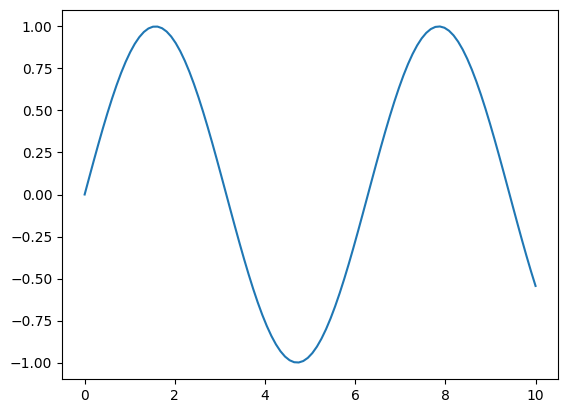

In [31]:
import matplotlib.pyplot as plt
import numpy as np                   # matplotlib มักใช้งานคู่กับ NumPy เสมอๆ

x = np.linspace(0,10,100)            # สร้าง NumPy array โดยมีค่าเริ่มต้นเท่ากับ 0 ค่าสุดท้ายเท่ากับ 10 โดยมีสมาชิกทั้งหมด 100 ตัว
plt.plot(x, np.sin(x))               # วาดกราฟโดยให้แกนนอนเป็นค่า x และแกนตั้งเป็นค่าของ sin(x)

plt.show()                           # แสดงผลกราฟที่วาดไว้

### การวาดกราฟย่อย

- เราสามารถวาดกราฟมากกว่าหนึ่งกราฟได้ โดยการวาดกราฟย่อยลงไปบนกราฟหลัก
- แต่ก่อนอื่น เราจะต้องสร้างกราฟหลักขึ้นมาก่อน โดยใช้ฟังก์ชัน `figure()`
- หลังจากนั้น ทำการวาดกราฟย่อยลงไป ด้วยฟังก์ชัน `subplot()`
- โดยในฟังก์ชัน `subplot()` เราจะต้องกำหนดจำนวนแถว หลัก และตำแหน่งที่ต้องการวาดกราฟลงไปเช่นเดียวกับการใช้งาน MATLAB

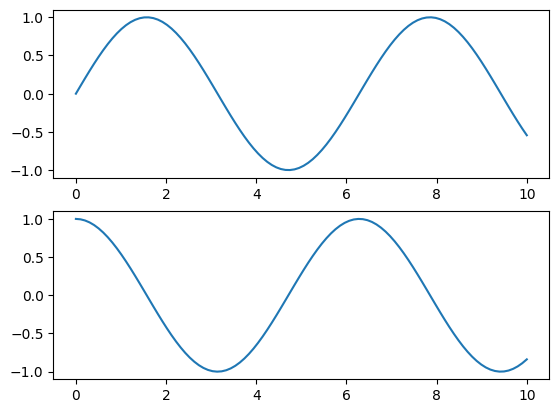

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)  # สร้าง NumPy array โดยมีค่าเริ่มต้นเท่ากับ 0 ค่าสุดท้ายเท่ากับ 10 โดยมีสมาชิกทั้งหมด 100 ตัว
plt.figure()               # สร้างกราฟหลัก


plt.subplot(2, 1, 1)       # สร้างกราฟย่อยอันแรก โดยกำหนดให้กราฟย่อยมีจำนวน 2 แถว 1 หลัก และกราฟย่อยนี้อยู่ในแถวที่ 1
plt.plot(x, np.sin(x))     # วาดกราฟโดยให้แกนนอนเป็นค่า x และแกนตั้งเป็นค่าของ sin(x)

plt.subplot(2, 1, 2)       # สร้างกราฟย่อยอันที่สอง โดยกำหนดให้กราฟย่อยมีจำนวน 2 แถว 1 หลัก และกราฟย่อยนี้อยู่ในแถวที่ 2
plt.plot(x, np.cos(x))     # วาดกราฟโดยให้แกนนอนเป็นค่า x และแกนตั้งเป็นค่าของ cos(x)

plt.show()                 # แสดงผลกราฟที่วาดไว้

- การอ้างถึงกราฟย่อยในแต่ละกราฟ สำหรับการวาดกราฟแบบ MATLAB เราสามารถสังเกตโปรแกรมด้านล่างได้

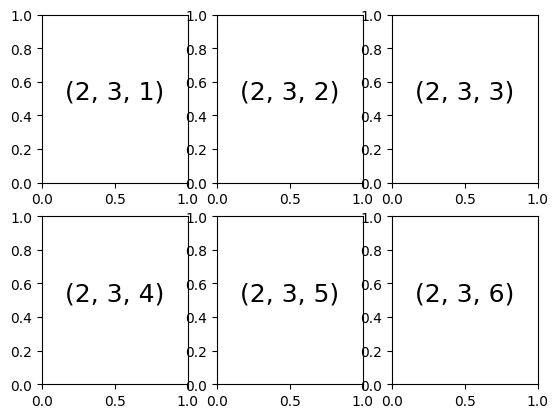

In [33]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
plt.show()

- นอกจากการวาดกราฟแบบ MATLAB แล้ว เรายังสามารถวาดกราฟย่อยได้ด้วยหลักการของการโปรแกรมเชิงวัตถุ
- โดยทำการสร้างวัตถุกราฟย่อย และทำการวาดกราฟลงบนวัตถุนั้น เช่น

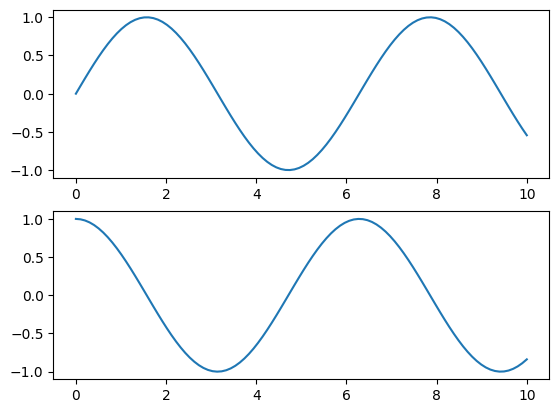

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)

fig, ax = plt.subplots(2)   # สร้างวัตถุกราฟ โดยมรจำนวน 2 กราฟย่อย

# ทำการเรียกเมธอด plot() เพื่อทำการวาดกราฟ
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

plt.show()

- การอ้างถึงกราฟย่อยในแต่ละกราฟ สำหรับการวาดกราฟเชิงวัตถุ เราสามารถสังเกตโปรแกรมด้านล่างได้

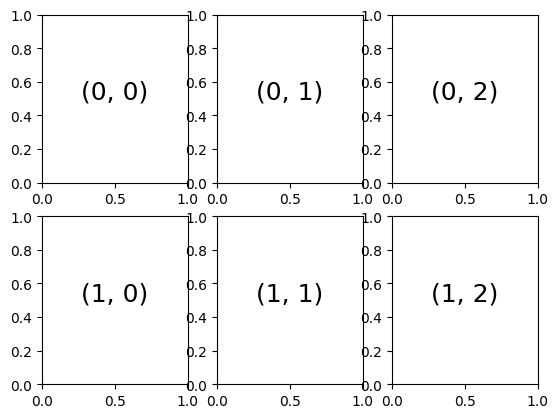

In [35]:
fig, ax = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
plt.show()

- หากเราไม่ได้ทำการสร้างกราฟย่อย ทั้งในรูปแบบของ MATLAB หรือการโปรแกรมเชิงวัตถุ กราฟที่วาด จะซ้อนอยู่ในรูปเดียวกัน เช่น

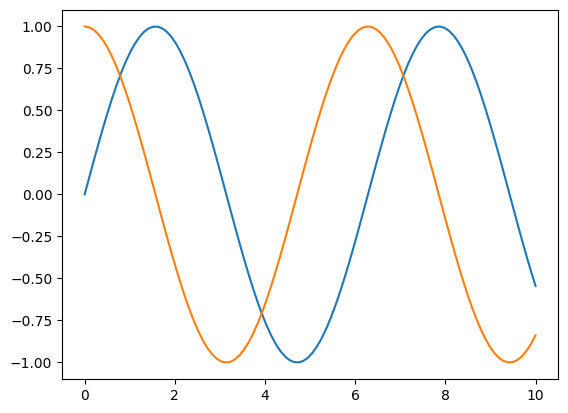

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

### การกำหนดรูปแบบของกราฟ

- ในแพคเกจของ Matplotlib เรามารถกำหนดรูปแบบของกราฟได้ด้วยฟังก์ชัน `style.use()` เช่น

<ipython-input-37-a35e36b0ba87>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # ทำการเปลี่ยนรูปแบบของกราฟ


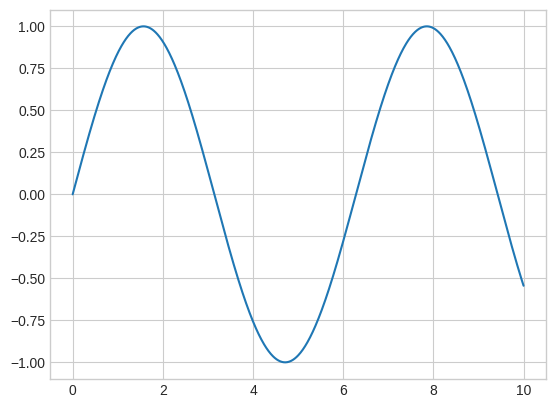

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
plt.style.use('seaborn-whitegrid') # ทำการเปลี่ยนรูปแบบของกราฟ

plt.plot(x, np.sin(x))
plt.show()


- Matplotlib ยังมีรูปแบบอื่นๆให้เราใช้อีกมากมาย ลองกดเข้าไปดูได้ที่ [ลิงค์นี้](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html) แล้วลองเปลี่ยนรูปแบบกราฟในโค้ดด้านบนดู

###การกำหนดรูปแบบและสีของเส้นกราฟ

- กรณีที่เราทำการวาดกราฟหลายๆเส้นลงบนกราฟเดียวกันนั้น การกำหนดสี และรูปแบบของเส้น จะช่วยเพิ่มความเด่นชัดของการอ่านข้อมูลได้
- ในการกำหนดสีของเส้นกราฟ Matplotlib รองรับรูปแบบการกำหนดสีไว้มากมาย โดยกำหนดผ่านพารามิเตอร์ `color` เช่น

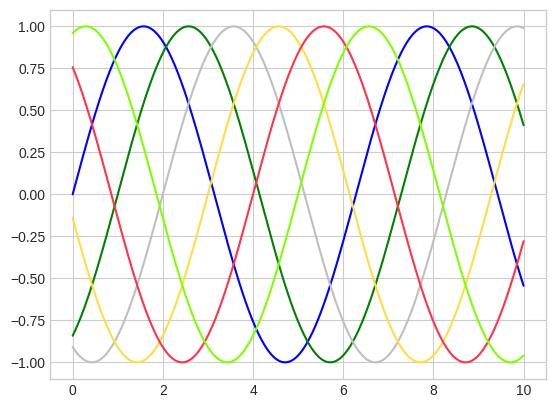

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue')        # กำหนดสีด้วยชื่อสี
plt.plot(x, np.sin(x - 1), color='g')           # กำหนดสีด้วยชื่อย่อ (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # กำหนดสีในโทนสีเทา โดยมีค่าตั้งแต่ 0 - 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # กำหนดสีด้วยรหัสสีเลขฐาน16 (RRGGBB: 00 - FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # กำหนดสีด้วยทูเพิลของรหัสสี RGB โดยมีค่า 0 - 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # กำหนดสีด้วยชื่อสีในรหัส HTML


- นอกจากสีแล้ว เรายังสามารถกำหนดรูปแบบของเส้นกราฟำด้อีกด้วย
- โดยการกำหนดรูปแบบของเส้นกราฟ เราจะทำผ่านพารามิเตอร์ชื่อ `linestyle`
- ซืึง Matplotlib รองรับการกำหนดรูปแบบของเส้นทั้งที่เป็นชื่อเต็ม และรหัสย่อ เช่น

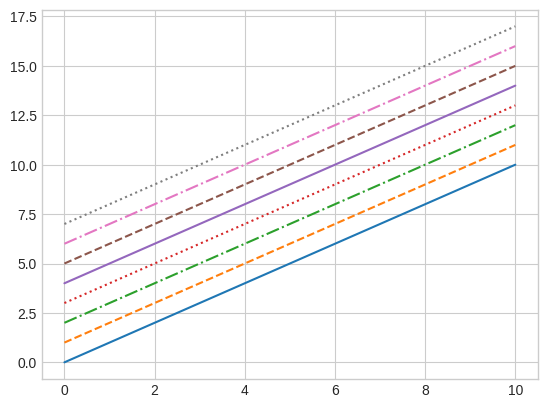

In [39]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted

- เรายังสามารถกำหนดรูปแบบและสีของเส้นกราฟได้ในเวลาเดียวกัน เช่น

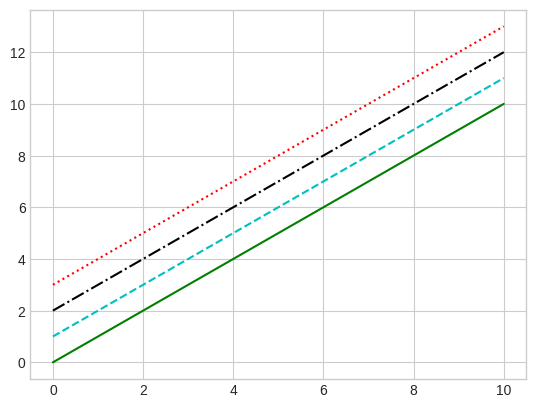

In [40]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r')  # dotted red

###การกำหนดขอบเขตของแกน

- ในการวาดกราฟ บางครั้งเราอาจต้องการแสดงขอบเขตของแกนกว้างกว่า หรือพอดีกับข้อมูลที่เราจะวาด
- เราสามารถกำหนดขอบเขตของแกนได้หลากหลายรูปแบบ เช่น
1. กำหนดผ่านฟังก์ชัน `xlim()` และ `ylim()`

(-1.5, 1.5)

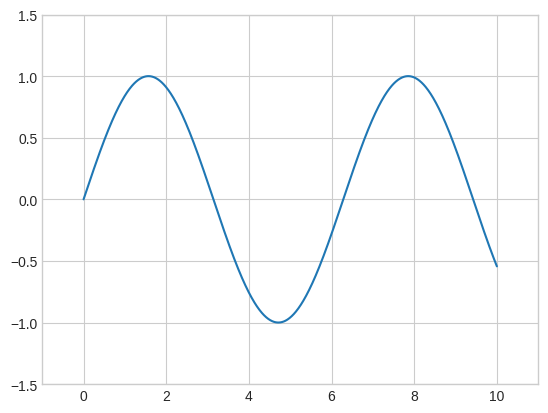

In [41]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

(1.2, -1.2)

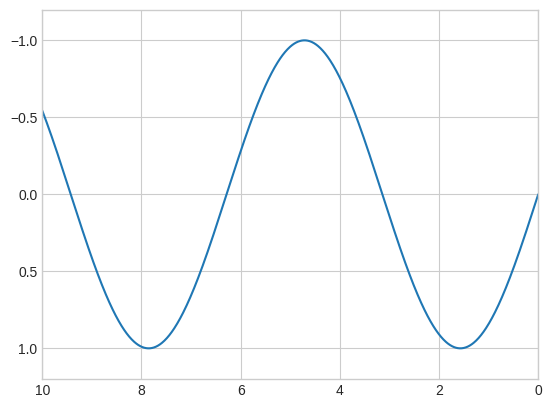

In [42]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

2. กำหนดผ่านฟังก์ชัน `axis()`

(-1.0, 11.0, -1.5, 1.5)

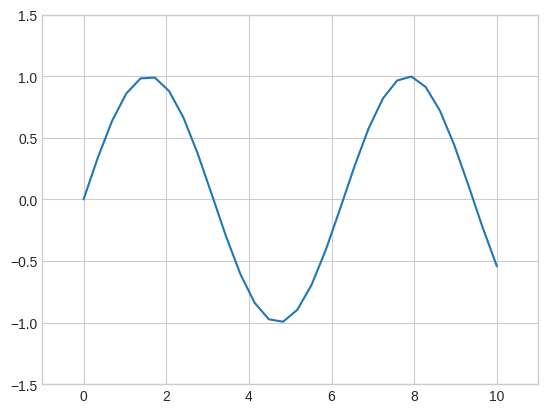

In [48]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

(-0.5, 10.5, -1.092892385484403, 1.0965531492716938)

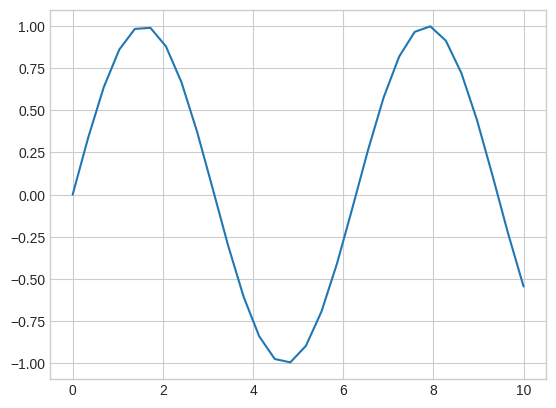

In [49]:
plt.plot(x, np.sin(x))
plt.axis('tight')

(-0.5, 10.5, -1.092892385484403, 1.0965531492716938)

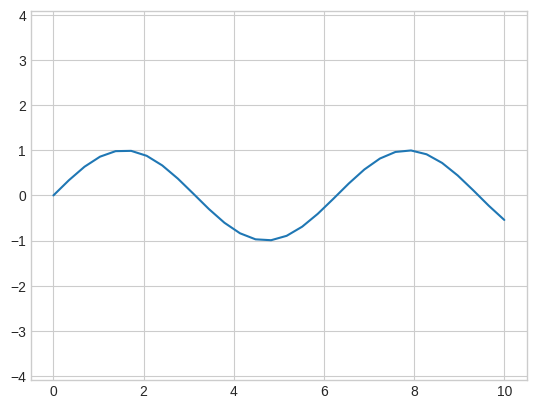

In [50]:
plt.plot(x, np.sin(x))
plt.axis('equal')

###การตั้งชื่อกราฟ และชื่อแกน

- เราสามารถกำหนดชื่อกราฟ และชื่อของแกนแต่ละแกนได้โดย
1. ฟังก์ชัน `title` เป็นฟังก์ชันที่ใช้สำหรับตั้งชื่อกราฟ
2. ฟังก์ชัน `xlabel()` เป็นฟังก์ชันที่ใช้ตั้งชื่อแกน `x`
3. ฟังก์ชัน `ylabel()` เป็นฟังก์ชันที่ใช้ตั้งชื่อแกน `y`

Text(0, 0.5, 'sin(x)')

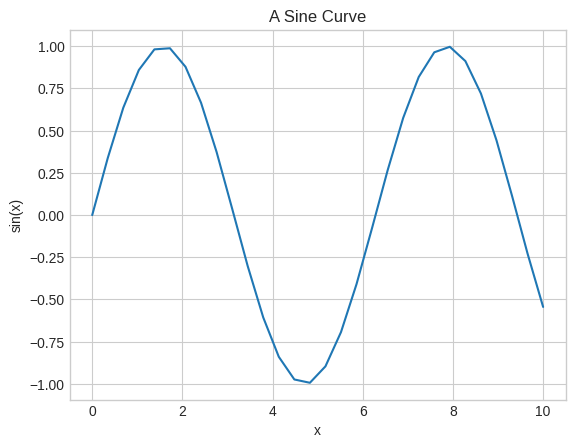

In [51]:
plt.plot(x, np.sin(x))
plt.title('A Sine Curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

- นอกจากนั้น เรายังสามารถตั้งชื่อให้กับเส้นกราฟแต่ละเส้นได้อีกด้วย
- โดยการตั้งชื่อเส้นกราฟนั้น เราจะตั้งผ่านพารามิเตอร์ `label` ในฟังก์ชัน `plot()`
- แต่ชื่อของเส้นกราฟจะยังไม่แสดง จนกว่าเราจะเรียกฟังก์ชัน `legend()`
- ซึ่งฟังก์ชัน `legend()` เราจะสามารถระบุตำแหน่งที่จะแสดงข้อมูลของเส้นกราฟได้ผ่านทางพารามิเตอร์ `loc`

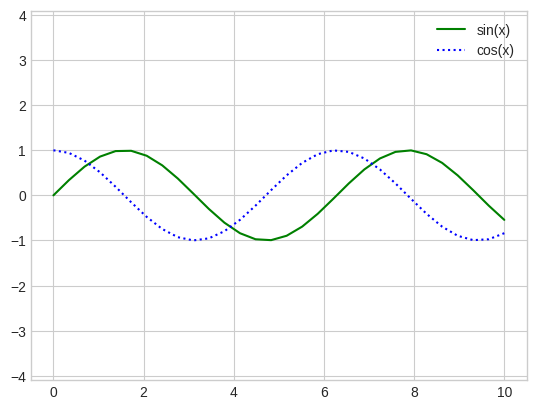

In [46]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

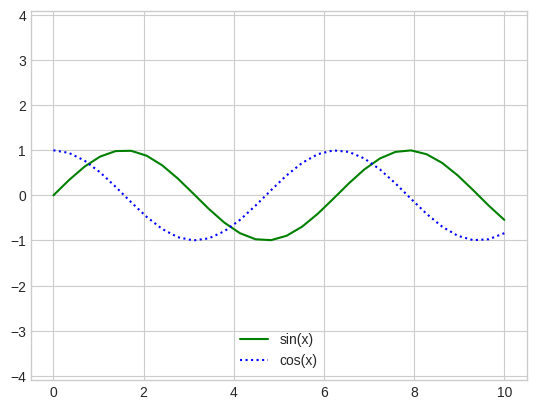

In [47]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='lower center')

- พารามิเตอร์ `loc` สามารถตั้งค่าได้ดังนี้

|Location String|Location Code|
|---|:---:|
|'best'|0|
|'upper right'|1|
|'upper left'|2|
|'lower left'|3|
|'lower right'|4|
|'right'|5|
|'center left'|6|
|'center right'|7|
|'lower center'|8|
|'upper center'|9|
|'center'|10|

- ในฟังก์ชัน `legend()` เรายังสามารถระบุจำนวนคอลัมน์ ของการแสดงผลชื่อของเส้นกราฟได้ด้วย ผ่านทางพารามิเตอร์ `ncol` เช่น

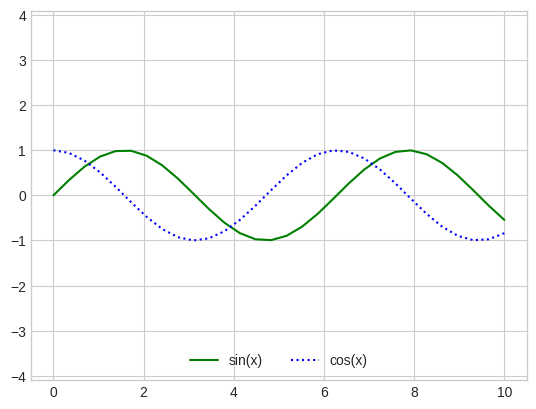

In [45]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='lower center',ncol=2)

### การวาดกราฟแบบกระจัด

- นอกจากการวาดกราฟเส้นแล้ว Matplotlib ยังสามารถวาดกราฟแบบกระจัดได้ด้วย
- โดยการวดกราฟแบบกระจัด สามารถทำได้ผ่านทางฟังก์ชัน `plot()` หรือ `scatter()` ก็ได้

1. การวาดกราฟกระจัดด้วยฟังก์ชัน `plot()`
  - ทำการเปลี่ยนพารามิเตอร์ในฟังก์ชัน `plot()` จาก `linestyle` เป็น `marker`

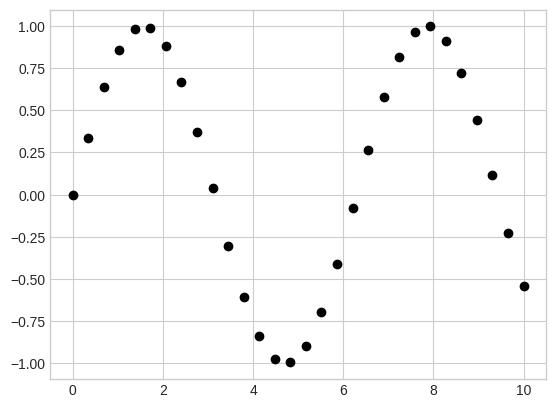

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

  - ซึ่ง `marker` นั้น สามารถมีได้หลายรูปแบบ เช่น

(0.0, 1.8)

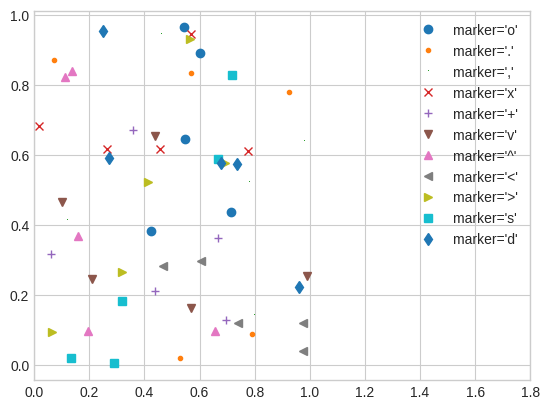

In [43]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend()
plt.xlim(0, 1.8)

- เรายังสามารถวาดกราฟแบบกระจัดโดยมีเส้นเชื่อมได้อีกด้วย เช่น

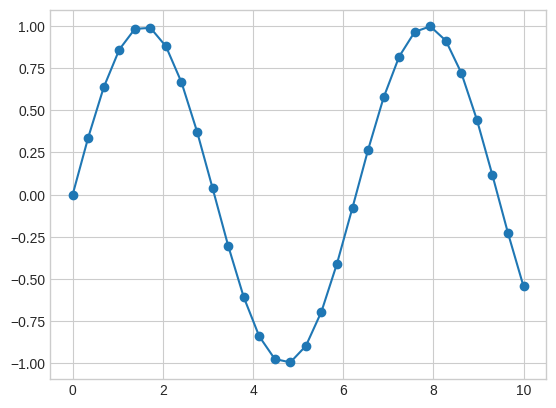

In [52]:
plt.plot(x, y, '-o');

- ในฟังก์ชัน `plot()` ยังมีพารามิเตอร์อื่นๆให้เราได้กำหนดอีกมากมาย เช่น

(-1.2, 1.2)

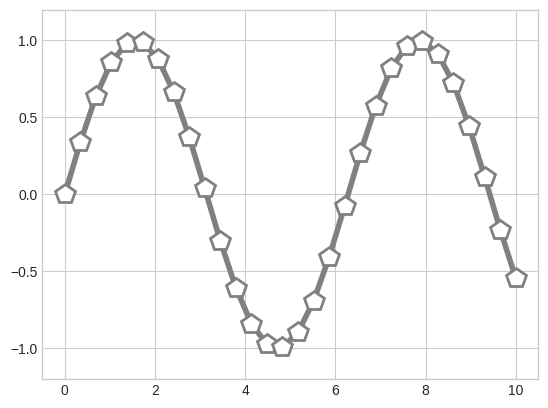

In [53]:
plt.plot(x, y, '-p',                 # วาดกราฟโดยใช้ marker รูปห้าเหลี่ยม เชื่อมด้วยเส้นทึบ
         color='gray',               # กำหนดสีเส้นกราฟเป็นสีเทา
         markersize=15,              # กำหนดขนาดของ marker
         linewidth=4,                # กำหนดความกว้างของเส้นกราฟ
         markerfacecolor='white',    # กำหนดสีของ marker
         markeredgecolor='gray',     # กำหนดสีของขอบ marker
         markeredgewidth=2)          # กำหนดความกว้างของเส้นขอบ marker
plt.ylim(-1.2, 1.2)

2. วาดกราฟกระจัดด้วยฟังก์ชัน `scatter()`

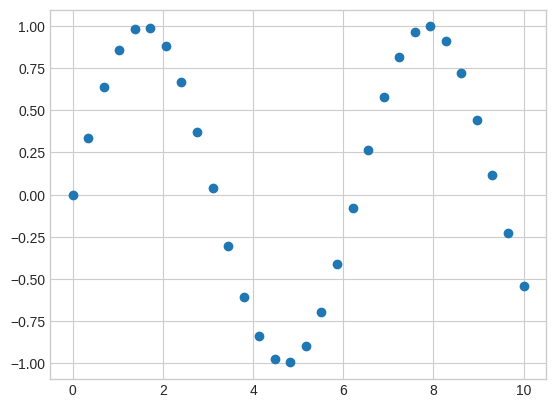

In [54]:
plt.scatter(x, y, marker='o')

- การใช้งานฟังก์ชัน `scatter()` คล้ายกับการใช้ฟังก์ชัน `plot()` เพียงแต่เราไม่สามารถลากเส้นเชื่อมแต่ละจุดได้
- ในฟังก์ชัน `scatter()` ก็มีพารามิเตอร์ที่เรากำหนดเองได้คล้ายกับฟังก์ชัน `plot()` เช่น `size, face color, edge color` และอื่นๆอีกมากมาย

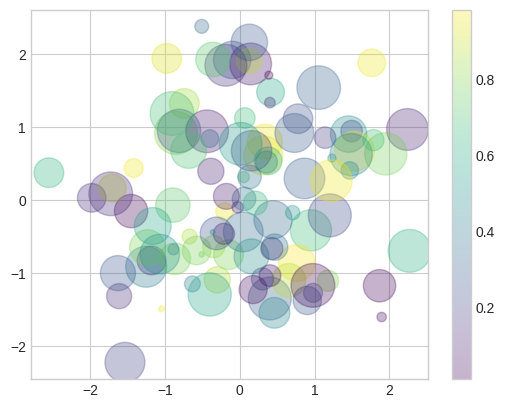

In [55]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()

- ในโปรแกรมด้านบน เรามีพารามิเตอร์และการใช้งานฟังก์ชันเพิ่มเติมดังนี้
 - `color` ใช้กำหนดสีของจุด
  - `size` ฬช้กำหนดขนาดของจุด
  - `alpha` ใช้กำหนดความโปร่งแสงของจุด
  - `cmap` ใช้กำหนดตารางสี เราสามารถเลือกตารางสีได้ที่ [ลิงค์ตารางสี](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
  - `colorbar()` ให้โปรแกรมแสดงตารางสี

###การวาดกราฟสามมิติ

- โดยทั่วไปแล้ว Matplotlib รองรับการวาดกราฟเฉพาะสองมิติเท่านั้น
- ฉะนั้น หากเราต้องการวาดกราฟสามมิติ เราจะต้องนำเข้าเครื่องมือเพิ่มเติม
- เครื่องมือ `(toolkit)` นั้นชื่อว่า `mplot3d` ซึ่งเป็นเครื่องมือที่สร้างมาจากพื้นฐาน `Matplotlib` อีกทีหนึ่ง
- ดังนั้น ก่อนการวาดกราฟสามมิติ เราจะต้องนำเข้าเครื่องมือ ดังโปรแกรมต่อไปนี้

In [56]:
from mpl_toolkits import mplot3d

- หลังจากนำเข้าเครื่องมือแล้ว เราจะสามารถสร้างกราฟสามมิติได้ดังนี้

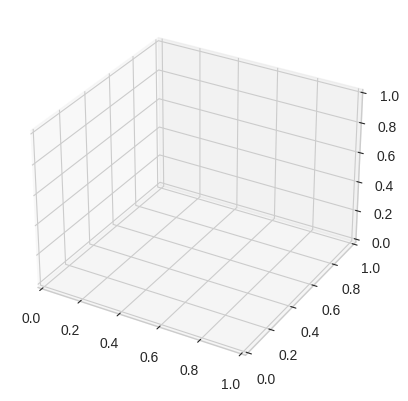

In [57]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

- หลังจากที่เราทำการสร้างกราฟ ซึ่งมีลักษณะแกนเป็นสามมิติแล้ว เราจะสามารถทำการวดกราฟลงไปได้
- โดยการวาดกราฟสามมิตินั้น เราจะเรียกผ่านฟังก์ชัน `plot3D()` เช่น

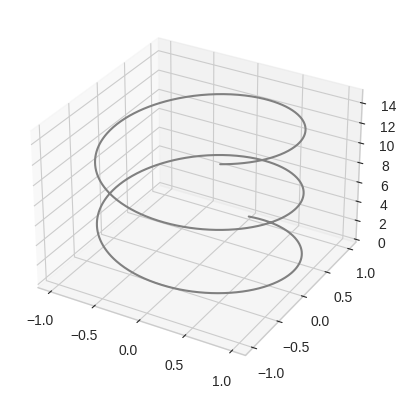

In [58]:
import numpy as np
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

- เรายังสามารถวาดกราฟกระจัดบนแกนสามมิติได้อีกด้วย
- โดยการเรียกฟังก์ชัน `scatter3D()`

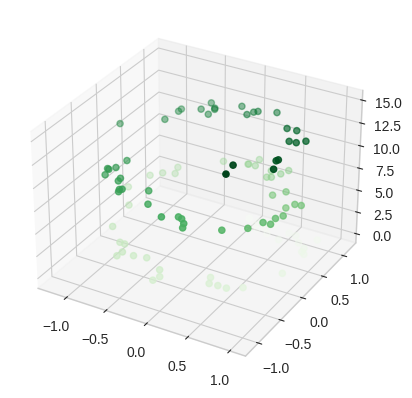

In [59]:
ax = plt.axes(projection='3d')
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

- การวาดกราฟทั้งแบบเส้น และแบบกระจัด สามารถวาดลงบนแกนเดียวกันก็ได้

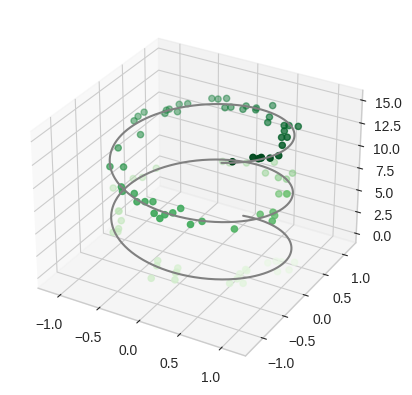

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

- เราสามารถกำหนดมุมมองเริ่มต้นของกราฟสามมิติได้โดย กำหนดผ่านฟังก์ชัน `view_init()`

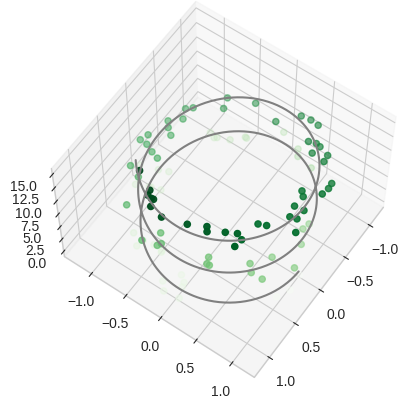

In [61]:
ax.view_init(60, 35) #<< degree from X, Y & degree from Z
fig

- ฟังก์ชัน `view_init()` รับพารามิเตอร์ 2 ตัว คือ
 - `elev` คือ องศาการมองในระนาบ `x-y` มีหน่วยเป็นดีกรี
 - `azim` คือ องศาการหมุนรอบแกน `z` มีหน่วยเป็นดีกรี

- นอกจากการวาดกราฟเส้น และกราฟกระจัดลงบนแกรสามมิติแล้ว เรายังสามารถวาดกราฟแบบอื่นๆำด้อีกด้วย เช่น
 - กราฟเส้นโครงร่าง
 - กราฟเส้นโครงกรอบ
 - กราฟพื้นผิว

In [62]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

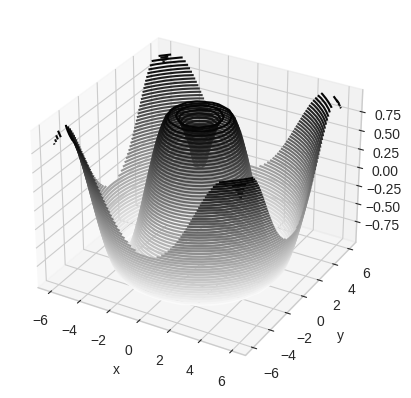

In [63]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

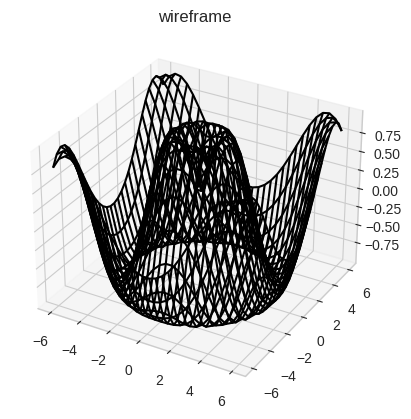

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

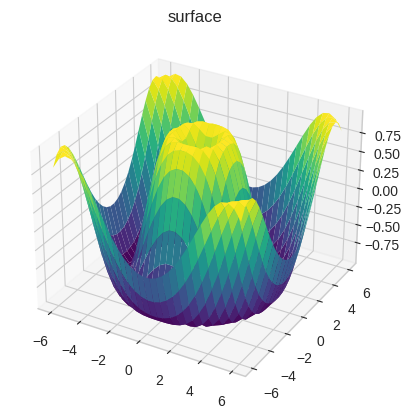

In [65]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

## หัวข้อที่ 5: Seaborn & Pandas

### Pandas

- `Pandas` เป็นแพคเกจที่สร้างบนพื้นฐาน `NumPy`
- `Pandas` มาจาก `Panel Data` ไม่ได้เกี่ยวอะไรกับหมีแพนด้า
- `Pandas` มีแพคเกจย่อยที่น่าสนใจคือ `DataFrame`
- `DataFrame` ช่วยให้เราสามารถจัดการกับข้อมูลได้ง่ายขึ้น
- ก่อนการใช้งาน เช่นเคย เราจะต้องนำเข้าแพคเกจของ `Pandas` ซึ่งมักจะนิยมตั้งชื่อเล่นว่า `pd`

In [66]:
import pandas as pd

### Seaborn

- `Seaborn` เป็นแพคเกจที่ใช้ในการวาดกราฟเช่นเดียวกับ `Matplotlib`
- ซึ่งตัว `Seaborn` เอง จริงๆแล้วก็พัฒนามาจาก `Matplotlib` อีกทีหนึ่ง
- เพียงแต่การทำงานของ `Seaborn` จะทำในลักษณะ `High Level`
- ซึ่งจะช่วยให้เราวาดกราฟเปรียบเทียบข้อมูลต่างๆได้ง่ายขึ้น
- โดยส่วนใหญ่แล้ว เรามักจะใช้ `Seaborn` ในการวาดกราฟของข้อมูลใรแพคเกจย่อย `DataFrame` ซึ่งอยู่ในแพคเกจ `Pandas`
- แน่นอนว่า การใช้งาน `Seaborn` เราจะต้องทำการนำเข้าแพคเกจก่อน และเรามักจะตั้งชื่อเล่นให้มันว่า sns

In [67]:
import seaborn as sns

- ใน `Seaborn` มีชุดข้อมูลที่มันจะนำมาใช้ในการทดลองเขียนโปรแกรมเกี่ยวกับ `Data Science` และ `AI`
- โดยเราสามารถดาวน์โหลดชุดข้อมูลได้ผ่านทางฟังก์ชัน `load_dataset`
- ในการเรียกฟังก์ชัน `load_dataset` จำเป็นจะต้องทำการเชื่อมต่ออินเตอร์เนต เนื่องจากเป็นการดาวน์โหลดข้อมูลออนไลน์
- เราสามารถตรวจสอบ `dataset` ที่มีอยู่ได้ผ่านทาง [dataset](https://github.com/mwaskom/seaborn-data)


In [68]:
# ดาวน์โหลด dataset ชื่อ iris
iris = sns.load_dataset('iris')

ชุดข้อมูล `Iris` เป็นชุดข้อมูลของดอก Iris

ชุดข้อมูลนี้ประกอบด้วย:

1. `sepal length`: ความยาวของ sepal ในหน่วยซม.
2. `sepal width`: ความกว้างของ sepal ในหน่วยซม.
3. `petal length`: ความยาวของ petal ในหน่วยซม.
4. `petal width`: ความกว้างของ petal ในหน่วยซม.
5. `species`: ชนิดของ iris ซึ่งมี 3 ชนิด ได้แก่ Setosa, Versicolour, และ Virginica

ชุดข้อมูลนี้มีทั้งหมด 150 ตัวอย่าง

- เมื่อเราทำการตรวจสอบชนิดของตัวแปร จะเห็นว่า เป็นตัวแปรประเภท `DataFrame`

IRIS configulation

https://www.fs.usda.gov/wildflowers/beauty/iris/images/flower/blueflagiris_flower_lg.jpg

In [69]:
type(iris)

pandas.core.frame.DataFrame

### Seaborn with Pandas

- เราสามารถกรองข้อมูลประเภท `DataFrame` ได้โดยง่าย ผ่านฟังก์ชัน `loc()` เช่น

In [70]:

# function loc == filter w/ condition

iris.loc[iris['species']=='setosa']

sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa
16           5.4          3.9           1.3          0.4  setosa
17           5.1          3.5           1.4          0.3  setosa
18           5.7          3.8           1.7          0.3  setosa
19           5.1          3.8           1.5          0.3  setosa
20           5.4          3.4           1.7          0.2  setosa
21           5.1          3.7           1.5          0.4  setosa
22           4.6          3.6           1.0          0.2  setosa
23           5.1          3.3           1.7          0.5  setosa
24           4.8          3.4           1.9          0.2  setosa
25           5.0          3.0           1.6          0.2  setosa
26           5.0          3.4           1.6          0.4  setosa
27           5.2          3.5           1.5          0.2  setosa
28           5.2          3.4           1.4          0.2  setosa
29           4.7          3.2           1.6          0.2  setosa
30           4.8          3.1           1.6          0.2  setosa
31           5.4          3.4           1.5          0.4  setosa
32           5.2          4.1           1.5          0.1  setosa
33           5.5          4.2           1.4          0.2  setosa
34           4.9          3.1           1.5          0.2  setosa
35           5.0          3.2           1.2          0.2  setosa
36           5.5          3.5           1.3          0.2  setosa
37           4.9          3.6           1.4          0.1  setosa
38           4.4          3.0           1.3          0.2  setosa
39           5.1          3.4           1.5          0.2  setosa
40           5.0          3.5           1.3          0.3  setosa
41           4.5          2.3           1.3          0.3  setosa
42           4.4          3.2           1.3          0.2  setosa
43           5.0          3.5           1.6          0.6  setosa
44           5.1          3.8           1.9          0.4  setosa
45           4.8          3.0           1.4          0.3  setosa
46           5.1          3.8           1.6          0.2  setosa
47           4.6          3.2           1.4          0.2  setosa
48           5.3          3.7           1.5          0.2  setosa
49           5.0          3.3           1.4          0.2  setosa

- ฟังก์ชันที่ใช้ในการวาดกราฟของ `Seaborn` มีมากมาย เราจะยกตัวอย่างฟังก์ชันที่น่าสนใจคือ
 - `pairplot()`
 - `catplot()`

- `pairplot` เป็นการวาดกราฟโดยจับคู่ข้อมูลในทุกความน่าจะเป็น เช่น
 - ในชุดข้อมูล `iris` มีข้อมูลทั้งหมด 5 คอลัมน์
 - หากเราเลือกข้อมูล 1 คอลัมน์ มาเป็นข้อมูลในการแสดงผล เราจะเหลือข้อมูล 4 คอลัมน์
 - `pairplot` จะนำข้อมูลที่เหลือทั้ง 4 คอลัมน์ มาจับคู่วาดกราฟ
 - ฉะนั้น เราจะได้กราฟทั้งหมด 16 แบบ โดยมีกราฟที่จับคู่คอลัมน์ของตัวเองรวมอยู่ด้วย
 - เช่น เราต้องการวาดกราฟโดยแยกตาม `species` เราจะได้

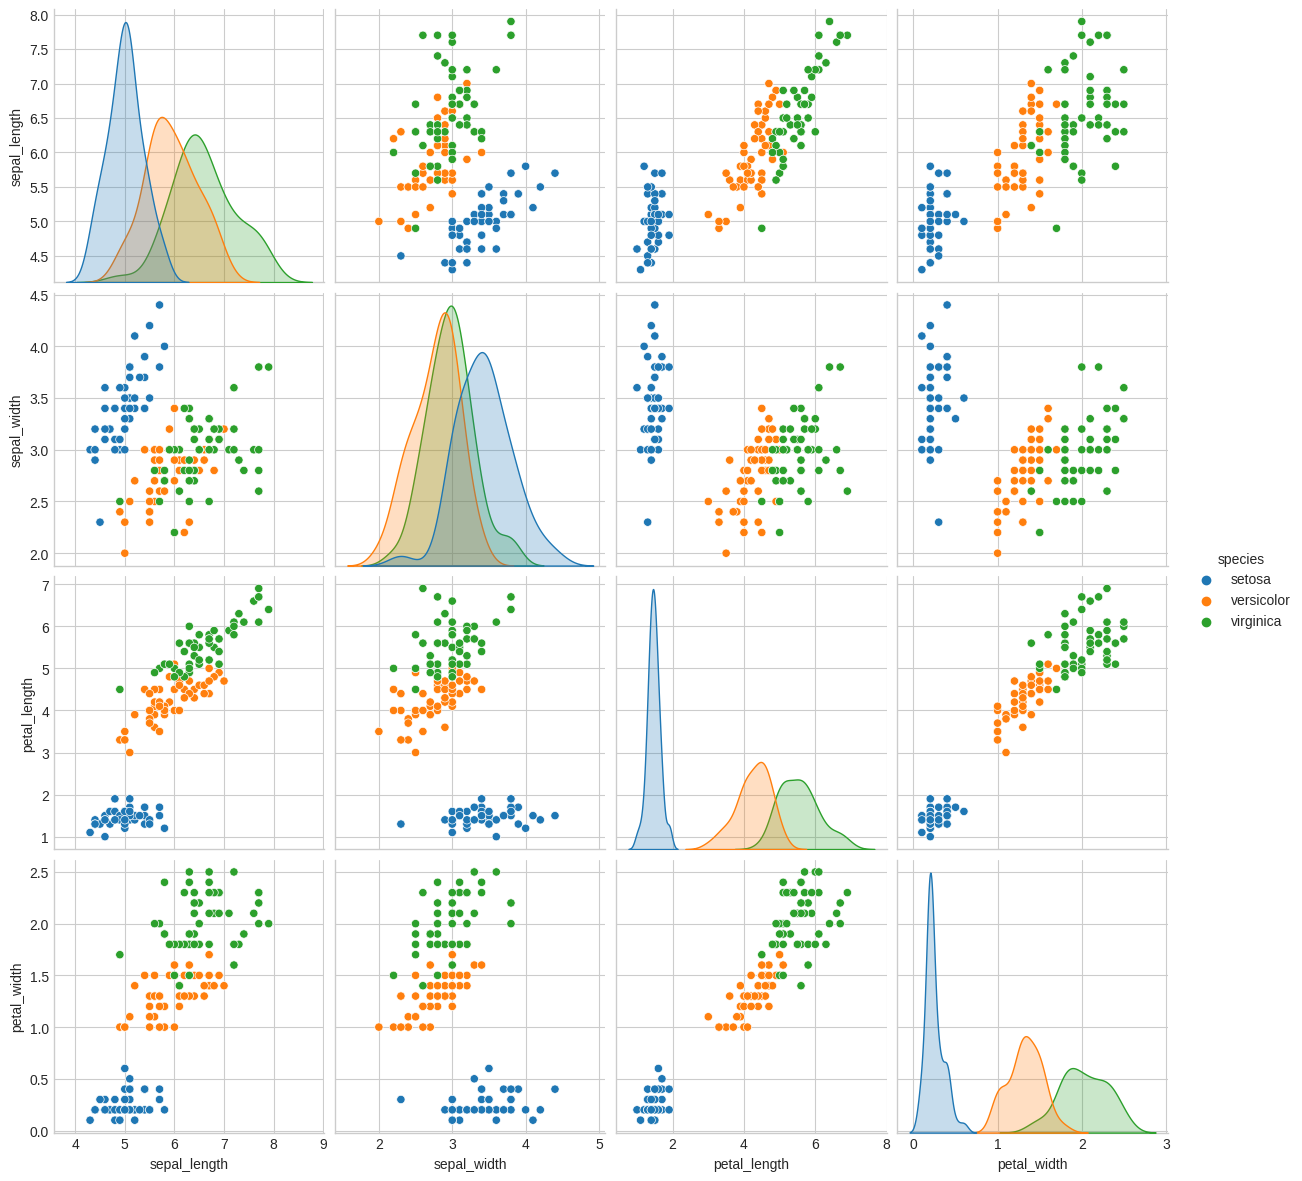

In [71]:
sns.pairplot(iris, hue='species', height=3)

- โดยพารามิเตอร์แรกที่เรากำหนดในฟังก์ชัน คือชุดของข้อมูล ที่มีชนิดข้อมูลเป็น `DataFrame`
- พารามิเตอร์ `hue` ตือชื่อคอลัมน์ที่เราต้องการนำมาแสดงผล
- `height` คือความสูงของกราฟแต่ละอัน

- `catplot` เป็นฟังก์ชันที่ใช้ในการวาดกราฟโดยมุ่งเน้นที่ความสัมพันธ์ของข้อมูล หรือการแบ่งกลุ่มข้อมูล
- ในการยกตัวอย่างการใช้งานฟังก์ชัน `catplot` เราจะนำเข้าชุดข้อมูลที่ชื่อ `planets`

In [74]:
planets = sns.load_dataset('planets')
planets

method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]

- เราจะทำการวาดกราฟ โดยนับจำนวนข้อมูลแยกตามปี

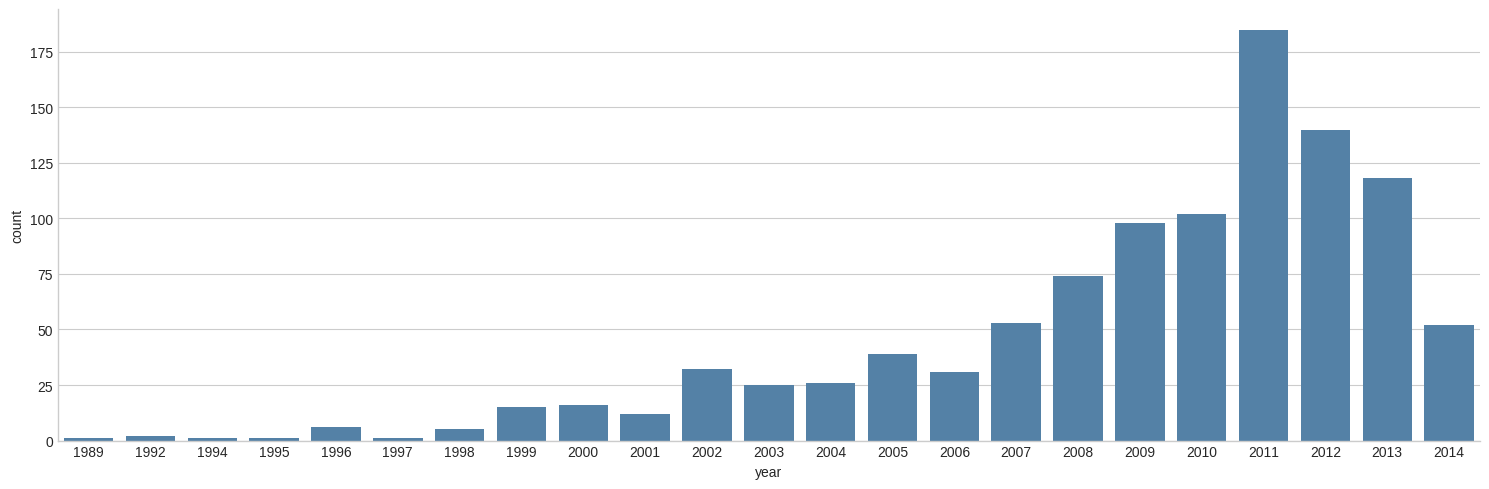

In [75]:
sns.catplot(x='year',
            data=planets,
            kind='count',
            color='steelblue',
            aspect=3)

###แบบฝึกหัด 5.1

1. ดาวน์โหลดข้อมูลจาก `Seaborn dataset` ที่ชื่อว่า `tips`

ชุดข้อมูล `tips` เป็นชุดข้อมูลพนักงานเสิร์ฟในร้านอาหาร

 ข้อมูลที่รวบรวมไว้ประกอบด้วย:

1.  `total_bill`: ราคาต่อใบเสร็จ (usd)
2.  `tip`: ทิป (usd)
3. `sex`: เพศของผู้ชำระเงิน
4. `smoker`: มีคนสูบบุหรี่หรือไม่
5. `day`: วันของสัปดาห์
6. `time`: มื้อที่ทาน
7. `size`: จำนวนผู้ร่วมโต๊ะ

ชุดข้อมูลนี้มีทั้งหมด 244 รายการ

In [77]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

2. กรองข้อมูลเฉพาะค่า `tip` มากกว่า 5

In [78]:
tips.loc[tips['tip']>5]

total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
44        30.40   5.60    Male     No   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
52        34.81   5.20  Female     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
88        24.71   5.85    Male     No  Thur   Lunch     2
116       29.93   5.07    Male     No   Sun  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
155       29.85   5.14  Female     No   Sun  Dinner     5
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
183       23.17   6.50    Male    Yes   Sun  Dinner     4
211       25.89   5.16    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3

3. วาดกราฟแสดงความสัมพันธ์ระหว่างจำนวนครั้งที่ได้ทิปในแต่ละช่วงเวลา

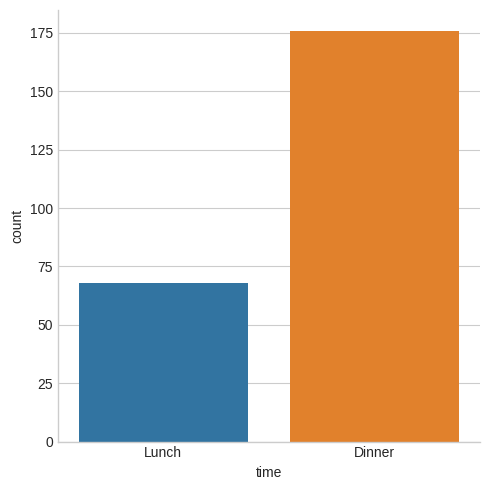

In [87]:
sns.catplot(x='time',
            data=tips,
            kind='count')

4. วาดกราฟแสดงความสัมพันธ์ระหว่างจำนวนครั้งที่ได้ทิปของผู้หญิงและผู้ชาย

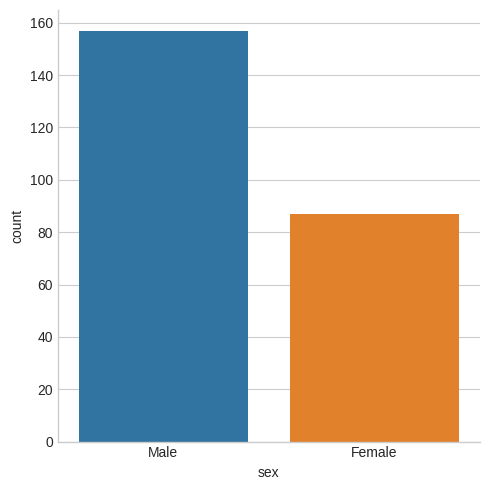

In [88]:
sns.catplot(x='sex',
            data=tips,
            kind='count')

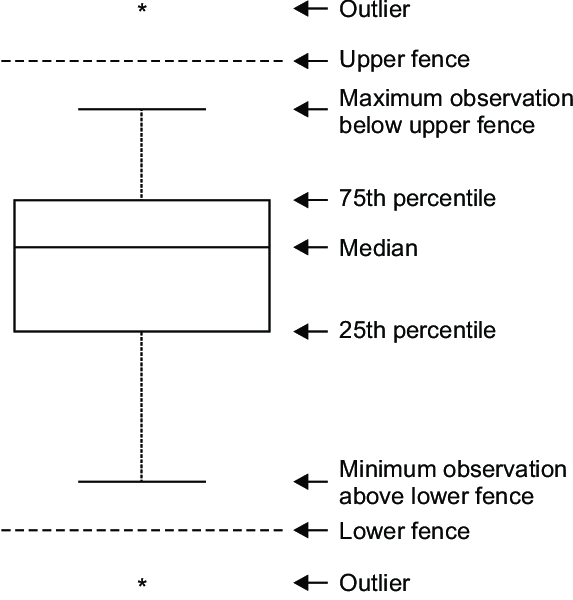### More about Pandas Dataframe

#### Import/Export csv ด้วย Pandas

เราสามารถใช้คำสั่ง `pd.read_csv` ในการอ่าน csv ไฟล์ และใช้คำสั่ง `.to_csv()` ในการเขียนไฟล์ csv ได้ดังตัวอย่าง

In [ ]:
https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [98]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url) #import from url

#df = pd.read_csv('penguins.csv') #import from direct csv

df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [99]:
df.to_csv('penguins_modify')

#### Data Preview

เราสามารถแสดงข้อมูลใน Dataframe บางส่วนด้วยคำสั่ง


*   `.head()` เป็นการแสดงข้อมูลจากหัวตาราง โดยเราสามารถระบุจำนวนที่ต้องการแสดงได้
*   `.tail()` เป็นการแสดงข้อมูลจากท้ายตาราง โดยเราสามารถระบุจำนวนที่ต้องการแสดงได้



In [100]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')

ชุดข้อมูล `penguins` เป็นชุดข้อมูลที่มีข้อมูลทางกายวิภาคของเพนกวิน 3 ชนิด ได้แก่ Adelie, Gentoo, และ Chinstrap

 ข้อมูลที่รวบรวมไว้ประกอบด้วย:



1.  `species`: ชนิดของเพนกวิน (Chinstrap, Adélie, หรือ Gentoo)
2.  `island`: ชื่อเกาะ (Dream, Torgersen, หรือ Biscoe) ใน Palmer Archipelago (Antarctica)
3. `bill_length_mm`: ความยาวของจะงอยปาก (มิลลิเมตร)
4. `bill_depth_mm`: ความลึกของจะงอยปาก (มิลลิเมตร)
5. `flipper_length_mm`: ความยาวของปีก (มิลลิเมตร)
6. `body_mass_g`: น้ำหนักตัว (กรัม)
7. `sex`: เพศของเพนกวิน

ชุดข้อมูลนี้มีทั้งหมด 344 รายการ

In [102]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [103]:
df.tail()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male

นอกจากนี้ เรายังสามารถแสดงข้อมูลของ Dataframe อื่นๆได้อีกด้วย เช่น

* `.shape` จะเป็นการแสดงจำนวนข้อมูลแยกตามมิติ

In [104]:
df.shape

(344, 7)

* `.info()` เป็นการแสดง Information ของ Dataframe

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* `.dtype` เป็นการตรวจสอบชนิดของข้อมูลในแต่ละ column

In [106]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

* `.describe()` เป็นการแสดงข้อมูลทางสถิติเบื้องต้น

In [107]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

* `.unique()` เป็นการแสดงข้อมูลที่ไม่ซ้ำกัน โดยจะต้องระบุชื่อ column ที่ต้องการแสดงผล

In [108]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

#### Data Cleaning

เราสามารถนับจำนวนข้อมูลที่เป็นช่องว่าง หรือ `null` ได้โดย `.isnull().sum()`

In [109]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

เราสามารถใช้คำสั่ง `.dropna()` เพื่อลบข้อมูลทั้งแถว ที่มีข้อมูลเป็น `null`

In [112]:
df_clean = df.dropna()

print(df_clean.isnull().sum())
print()

df_clean.info()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


เมื่อเราทำการลบข้อมูลไปแล้ว อาจทำให้ `index` ของข้อมูลไม่เรียงตามที่ควรจะเป็น เราสามารถจัดเรียง `index` ใหม่ได้โดยใช้คำสั่ง `.resetindex()`

In [113]:
df_clean.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

In [114]:
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

In [115]:
df_clean.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

นอกจากนี้ เรายังสามารถเติมข้อมูลที่ขาดหายไปได้อีกด้วย โดยใช้คำสั่ง `.fillna()`

In [116]:
df_fill = df.fillna(0) #filling N/A as 0
df_fill.head(20)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             0.0            0.0                0.0   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
15  Adelie  Torgersen            36.6           17.8              185.0   
16  Adelie  Torgersen            38.7           19.0              195.0   
17  Adelie  Torgersen            42.5           20.7              197.0   
18  Adelie  Torgersen            34.4           18.4              184.0   
19  Adelie  Torgersen            46.0           21.5              194.0   

    body_mass_g     sex  
0        3750.0    Male  
1        3800.0  Female  
2        3250.0  Female  
3           0.0       0  
4        3450.0  Female  
5        3650.0    Male  
6        3625.0  Female  
7        4675.0    Male  
8        3475.0       0  
9        4250.0       0  
10       3300.0       0  
11       3700.0       0  
12       3200.0  Female  
13       3800.0    Male  
14       4400.0    Male  
15       3700.0  Female  
16       3450.0  Female  
17       4500.0    Male  
18       3325.0  Female  
19       4200.0    Male

In [121]:
df_fill['sex'] = df['sex'].fillna('Male')

print(df['sex'].head(20))
print()

df_fill['sex'].head(20)

0       Male
1     Female
2     Female
3        NaN
4     Female
5       Male
6     Female
7       Male
8        NaN
9        NaN
10       NaN
11       NaN
12    Female
13      Male
14      Male
15    Female
16    Female
17      Male
18    Female
19      Male
Name: sex, dtype: object



0       Male
1     Female
2     Female
3       Male
4     Female
5       Male
6     Female
7       Male
8       Male
9       Male
10      Male
11      Male
12    Female
13      Male
14      Male
15    Female
16    Female
17      Male
18    Female
19      Male
Name: sex, dtype: object

เรายะงสามารถเพิ่ม parameter `method` ในการ `fill` ได้

* `bfill` เติมข้อมูลด้วยข้อมูลถัดไป
* `ffill` เติมข้อมูลด้วยข้อมูลก่อนหน้า

In [117]:
df_bfill = df.fillna(method='bfill')
df_bfill.head(20)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen            36.7           19.3              193.0   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
15  Adelie  Torgersen            36.6           17.8              185.0   
16  Adelie  Torgersen            38.7           19.0              195.0   
17  Adelie  Torgersen            42.5           20.7              197.0   
18  Adelie  Torgersen            34.4           18.4              184.0   
19  Adelie  Torgersen            46.0           21.5              194.0   

    body_mass_g     sex  
0        3750.0    Male  
1        3800.0  Female  
2        3250.0  Female  
3        3450.0  Female  
4        3450.0  Female  
5        3650.0    Male  
6        3625.0  Female  
7        4675.0    Male  
8        3475.0  Female  
9        4250.0  Female  
10       3300.0  Female  
11       3700.0  Female  
12       3200.0  Female  
13       3800.0    Male  
14       4400.0    Male  
15       3700.0  Female  
16       3450.0  Female  
17       4500.0    Male  
18       3325.0  Female  
19       4200.0    Male

In [118]:
df_ffill = df.fillna(method='ffill')
df_ffill.head(20)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen            40.3           18.0              195.0   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
15  Adelie  Torgersen            36.6           17.8              185.0   
16  Adelie  Torgersen            38.7           19.0              195.0   
17  Adelie  Torgersen            42.5           20.7              197.0   
18  Adelie  Torgersen            34.4           18.4              184.0   
19  Adelie  Torgersen            46.0           21.5              194.0   

    body_mass_g     sex  
0        3750.0    Male  
1        3800.0  Female  
2        3250.0  Female  
3        3250.0  Female  
4        3450.0  Female  
5        3650.0    Male  
6        3625.0  Female  
7        4675.0    Male  
8        3475.0    Male  
9        4250.0    Male  
10       3300.0    Male  
11       3700.0    Male  
12       3200.0  Female  
13       3800.0    Male  
14       4400.0    Male  
15       3700.0  Female  
16       3450.0  Female  
17       4500.0    Male  
18       3325.0  Female  
19       4200.0    Male

#### Data Filtering

เราสามารถเลือกข้อมูลที่ต้องการด้วยวิธี `.iloc` และ `.loc`

In [122]:
df.iloc[0] #select row

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object

In [123]:
df.iloc[0:10]   #select index to show dataframe

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       3625.0  Female  
7       4675.0    Male  
8       3475.0     NaN  
9       4250.0     NaN

In [124]:
df.loc[df['sex'] == 'Female']

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
6    Adelie  Torgersen            38.9           17.8              181.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
..      ...        ...             ...            ...                ...   
332  Gentoo     Biscoe            43.5           15.2              213.0   
334  Gentoo     Biscoe            46.2           14.1              217.0   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   

     body_mass_g     sex  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
6         3625.0  Female  
12        3200.0  Female  
..           ...     ...  
332       4650.0  Female  
334       4375.0  Female  
338       4925.0  Female  
340       4850.0  Female  
342       5200.0  Female  

[165 rows x 7 columns]

In [125]:
df.loc[df['flipper_length_mm'] > 200]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
90   Adelie      Dream            35.7           18.0              202.0   
91   Adelie      Dream            41.1           18.1              205.0   
95   Adelie      Dream            40.8           18.9              208.0   
101  Adelie     Biscoe            41.0           20.0              203.0   
123  Adelie  Torgersen            41.4           18.5              202.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
90        3550.0  Female  
91        4300.0    Male  
95        4300.0    Male  
101       4725.0    Male  
123       3875.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[148 rows x 7 columns]

In [126]:
df.loc[(df['sex'] == 'Female') & (df['body_mass_g'] > 4000)]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
160  Chinstrap   Dream            46.0           18.9              195.0   
220     Gentoo  Biscoe            46.1           13.2              211.0   
222     Gentoo  Biscoe            48.7           14.1              210.0   
225     Gentoo  Biscoe            46.5           13.5              210.0   
226     Gentoo  Biscoe            45.4           14.6              211.0   
228     Gentoo  Biscoe            43.3           13.4              209.0   
230     Gentoo  Biscoe            40.9           13.7              214.0   
232     Gentoo  Biscoe            45.5           13.7              214.0   
234     Gentoo  Biscoe            45.8           14.6              210.0   
236     Gentoo  Biscoe            42.0           13.5              210.0   
238     Gentoo  Biscoe            46.2           14.5              209.0   
241     Gentoo  Biscoe            45.1           14.5              215.0   
242     Gentoo  Biscoe            46.5           14.5              213.0   
244     Gentoo  Biscoe            42.9           13.1              215.0   
248     Gentoo  Biscoe            48.2           14.3              210.0   
251     Gentoo  Biscoe            42.8           14.2              209.0   
252     Gentoo  Biscoe            45.1           14.5              207.0   
254     Gentoo  Biscoe            49.1           14.8              220.0   
256     Gentoo  Biscoe            42.6           13.7              213.0   
258     Gentoo  Biscoe            44.0           13.6              208.0   
262     Gentoo  Biscoe            45.3           13.7              210.0   
265     Gentoo  Biscoe            43.6           13.9              217.0   
266     Gentoo  Biscoe            45.5           13.9              210.0   
268     Gentoo  Biscoe            44.9           13.3              213.0   
270     Gentoo  Biscoe            46.6           14.2              210.0   
272     Gentoo  Biscoe            45.1           14.4              210.0   
274     Gentoo  Biscoe            46.5           14.4              217.0   
276     Gentoo  Biscoe            43.8           13.9              208.0   
278     Gentoo  Biscoe            43.2           14.5              208.0   
280     Gentoo  Biscoe            45.3           13.8              208.0   
282     Gentoo  Biscoe            45.7           13.9              214.0   
284     Gentoo  Biscoe            45.8           14.2              219.0   
288     Gentoo  Biscoe            43.5           14.2              220.0   
290     Gentoo  Biscoe            47.7           15.0              216.0   
293     Gentoo  Biscoe            46.5           14.8              217.0   
294     Gentoo  Biscoe            46.4           15.0              216.0   
296     Gentoo  Biscoe            47.5           14.2              209.0   
298     Gentoo  Biscoe            45.2           13.8              215.0   
300     Gentoo  Biscoe            49.1           14.5              212.0   
302     Gentoo  Biscoe            47.4           14.6              212.0   
304     Gentoo  Biscoe            44.9           13.8              212.0   
306     Gentoo  Biscoe            43.4           14.4              218.0   
308     Gentoo  Biscoe            47.5           14.0              212.0   
310     Gentoo  Biscoe            47.5           15.0              218.0   
312     Gentoo  Biscoe            45.5           14.5              212.0   
314     Gentoo  Biscoe            44.5           14.7              214.0   
317     Gentoo  Biscoe            46.9           14.6              222.0   
318     Gentoo  Biscoe            48.4           14.4              203.0   
320     Gentoo  Biscoe            48.5           15.0              219.0   
322     Gentoo  Biscoe            47.2           15.5              215.0   
326     Gentoo  Biscoe            41.7           14.7              210.0   
328     Gentoo  Biscoe            43.3           14.0  

เราสามารถใช้คำสั่ง `.sort_values()` ในการเรียงลำดับข้อมูล

In [127]:
df.sort_values(by='flipper_length_mm', ascending=False)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
283  Gentoo     Biscoe            54.3           15.7              231.0   
333  Gentoo     Biscoe            51.5           16.3              230.0   
335  Gentoo     Biscoe            55.1           16.0              230.0   
285  Gentoo     Biscoe            49.8           16.8              230.0   
295  Gentoo     Biscoe            48.6           16.0              230.0   
..      ...        ...             ...            ...                ...   
122  Adelie  Torgersen            40.2           17.0              176.0   
20   Adelie     Biscoe            37.8           18.3              174.0   
28   Adelie     Biscoe            37.9           18.6              172.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g     sex  
283       5650.0    Male  
333       5500.0    Male  
335       5850.0    Male  
285       5700.0    Male  
295       5800.0    Male  
..           ...     ...  
122       3450.0  Female  
20        3400.0  Female  
28        3150.0  Female  
3            NaN     NaN  
339          NaN     NaN  

[344 rows x 7 columns]

###แบบฝึกหัด 5.2

จากข้อมูล dataset Titanic

1. `survived`: (0= No, 1=Yes)
2. `pclass`: The passenger class (1=1st, 2=2nd, 3=3rd)
3. `sex`: The gender of the passenger
4. `age`: The age of the passenger
5. `sibsp`: The number of siblings/spouses aboard
6. `parch`: The number of parents/children aboard
7. `fare`: The passengers fare cost
8. `embarked`: The port where the passenger embarked from (C=Cherbourg, Q=Queenstown, S=Southhampton)
9. `class`: The passenger class as a string (First, Second, Third)
10. `who`: A string that indicates if the passenger is a man, woman, or child
11. ` adult_male`: A boolean value indicating if the passenger is an adult male
12. `deck`: The deck of the ship where the passenger’s cabin was located
13. `embark_town`: The port where the passenger embarked from
14.  `alive`: A string indicating if the passenger survived or not (yes, no)
15. `alone`: A boolean value indicating if the passenger was alone or not


In [128]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


1. ทำการ clean ข้อมูล

คำใบ้: มีข้อมูลอยู่ 1 column ที่อาจจะต้องลบทิ้ง ลองค้นหาคำว่า `dataframe drop column`

In [133]:
# df = df.drop(['column1', 'column2'], axis=1)  # Drop multiple columns
# df = df.drop('column3', axis=1)  # Drop a single column

titanic = titanic.drop('deck', axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


2. นับจำนวนผู้รอดชีวิต และผู้เสียชีวิต

คำใบ้: ลองค้นหาคำว่า `dataframe value_counts`

In [138]:
print(titanic['survived'].value_counts())
print()

titanic['alive'].value_counts()

0    549
1    342
Name: survived, dtype: int64


no     549
yes    342
Name: alive, dtype: int64

3. นับจำนวนผู้เสียชีวิต แยกตาม ผู้ชาย ผู้หณิง และ เด็ก

In [140]:
titanic.loc[titanic['survived']==0]['who'].value_counts()

# concept code
# filter by using loc &
# survived == 0 &
# select column of who &
# value count by attribute who

man      449
woman     66
child     34
Name: who, dtype: int64

### More about Seaborn

In [141]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('penguins')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [142]:
data = data.dropna()

data.reset_index(drop=True)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
328  Gentoo     Biscoe            47.2           13.7              214.0   
329  Gentoo     Biscoe            46.8           14.3              215.0   
330  Gentoo     Biscoe            50.4           15.7              222.0   
331  Gentoo     Biscoe            45.2           14.8              212.0   
332  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3         3450.0  Female  
4         3650.0    Male  
..           ...     ...  
328       4925.0  Female  
329       4850.0  Female  
330       5750.0    Male  
331       5200.0  Female  
332       5400.0    Male  

[333 rows x 7 columns]

In [151]:
columns = data.columns.values.tolist()
print(columns)
print()

for column in columns:
    print(f'Header is: {column}')
    print()

    print(data[column].unique())
    print()

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

Header is: species

['Adelie' 'Chinstrap' 'Gentoo']

Header is: island

['Torgersen' 'Biscoe' 'Dream']

Header is: bill_length_mm

[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.

####Pie Chart using pandas `series.plot()`

[Pandas Series Plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)

[Matplotlib Pyplot Pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

In [148]:
species = data.species.value_counts()
print(species)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


In [149]:
type(species)

pandas.core.series.Series

<Axes: ylabel='species'>

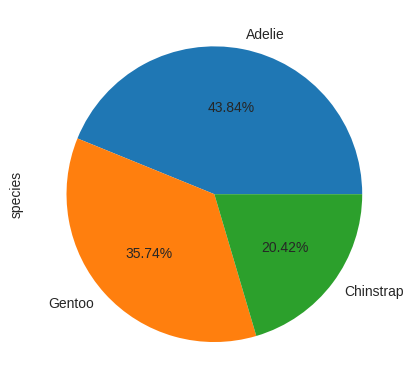

In [150]:
species.plot(kind='pie', autopct='%.2f%%')

####แบบฝึกหัด 5.3

ทำการวาด pie chart ของข้อมูลต่อไปนี้

1. island

<Axes: ylabel='island'>

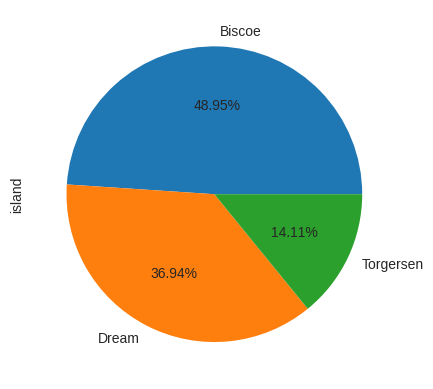

In [152]:
islands = data.island.value_counts()
islands.plot(kind='pie',autopct = '%.2f%%')

2. sex

<Axes: ylabel='sex'>

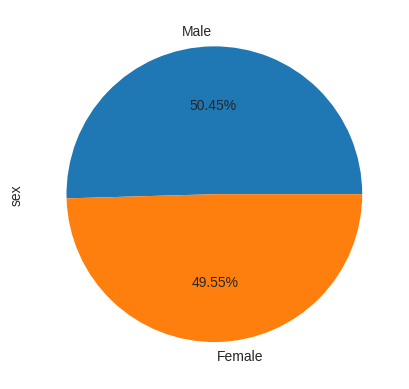

In [153]:
sex = data.sex.value_counts()
sex.plot(kind='pie',autopct = '%.2f%%')

#### Scatter Plot

กราฟแบบ scatter plot ใช้เพื่อแสดงความสัมพันธ์ระหว่างตัวแปร โดยแสดงผลเป็นจุดข้อมูล

[Seaborn Scatter Plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

Text(0.5, 1.0, 'Bill Length vs Bill Depth')

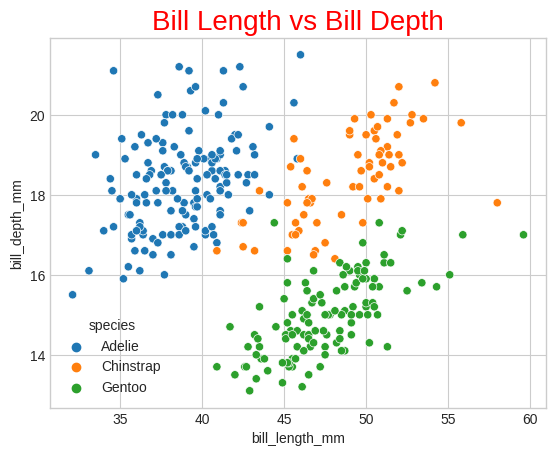

In [155]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=data, hue='species')

# edit by using plt code
plt.title('Bill Length vs Bill Depth', size=20, color='red')

####Histogram

กราฟแบบ histogram แสดงการกระจายของข้อมูล เราสามารถใช้กราฟแบบ histogram เพื่อดูการกระจายของตัวแปรหนึ่งหรือมากกว่า

[Seaborn Histogram Plot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

Text(0.5, 1.0, 'Flipper Length')

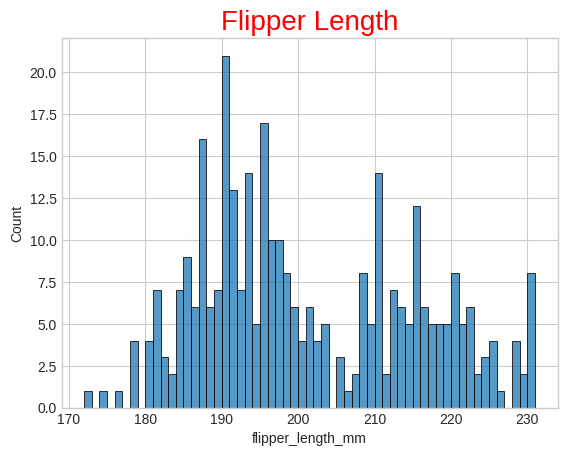

In [161]:
sns.histplot(x ='flipper_length_mm',
             data=data,
             binwidth=1)        # width of result base on sample
plt.title('Flipper Length', size=20, color='red')

เราสามารถกำหนดความกว้างของ bin ได้ โดยทำผ่าน parameter `binwidth`

Text(0.5, 1.0, 'Flipper Length')

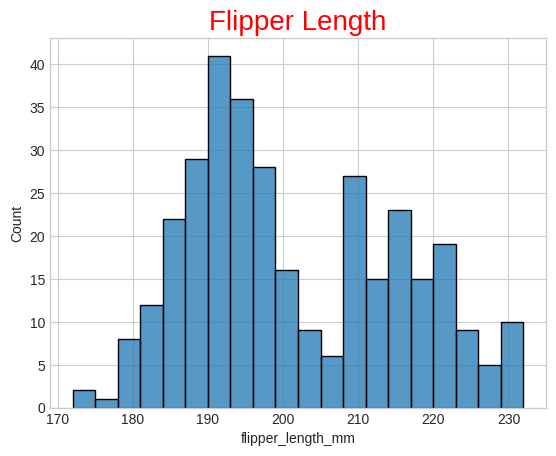

In [158]:
sns.histplot(x = 'flipper_length_mm', data = data, binwidth=3)
plt.title('Flipper Length', size=20, color='red')

นอกจากนี้ เรายังสามารถเพิ่มเส้นการกระจายความน่าจะเป็นลงในกราฟำด้โดยผ่าน parameter `kde`

Text(0.5, 1.0, 'Flipper Length')

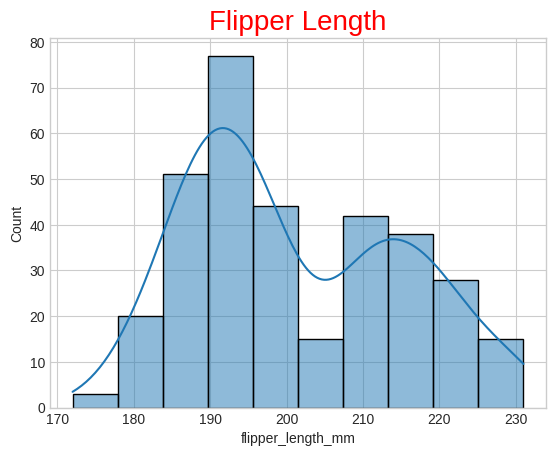

In [159]:
sns.histplot(x = 'flipper_length_mm', data = data, kde = True)
plt.title('Flipper Length', size=20, color='red')

เราสามารถแสดงข้อมูลของแต่ละ species โดยแยกตามสีได้ผ่าน parameter `hue`

Text(0.5, 1.0, 'Flipper Length')

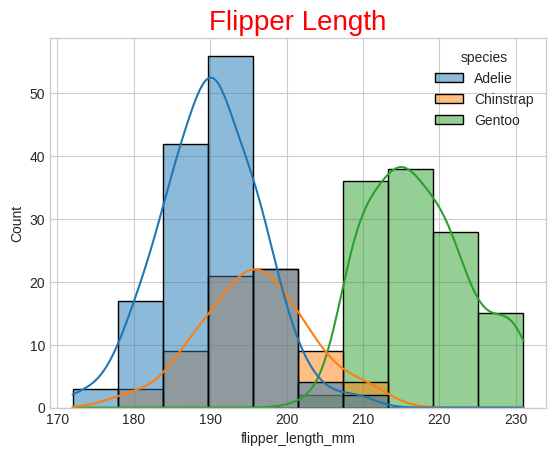

In [162]:
sns.histplot(x = "flipper_length_mm",
             data = data,
             hue = "species",
             kde = True)
plt.title("Flipper Length", size=20, color="red")

####Bar Plot

กราฟแท่ง (Bar Plot) เป็นการแสดงข้อมูลค่าแนวโน้มเข้าสู่ศูนย์กลาง (central tendency)

[Seaborn Bar Plot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

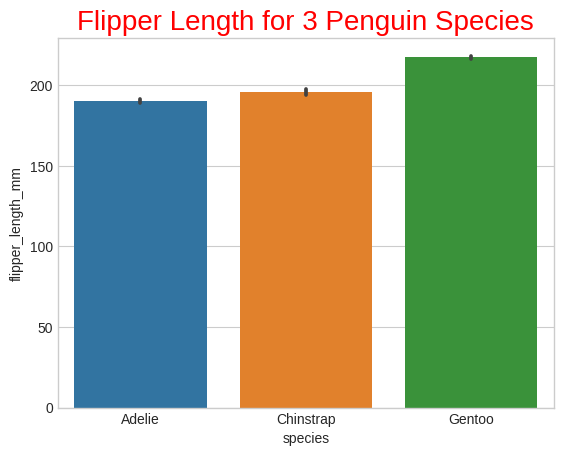

In [163]:
sns.barplot(x ="species", y="flipper_length_mm", data=data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

เราสามารถแสดงข้อมูลของแต่ละ sex โดยแยกตามสีได้ผ่าน parameter `hue`

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

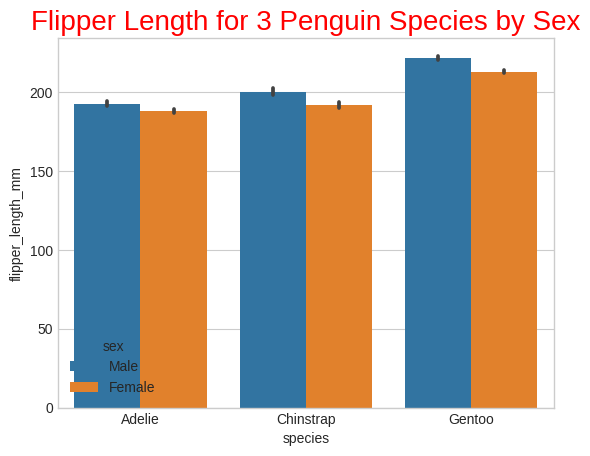

In [164]:
sns.barplot(x = "species", y = "flipper_length_mm", data =data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

#### Box Plot

กราฟกล่อง (box or box-and-whisker plot) แสดงการกระจายของข้อมูลเชิงปริมาณในการเปรียบเทียบระหว่างตัวแปรหรือข้ามระดับของตัวแปรหมวดหมู่ box จะแสดงควอร์ไทล์ของชุดข้อมูลในขณะที่ whisker แสดงการแจกแจงส่วนที่เหลือ ยกเว้นจุดที่กำหนดให้เป็น "ค่าผิดปกติ" (outliers)

![](https://drive.google.com/uc?export=view&id=1XG8pO_D6mld9-rE83U5pwaN02d60ratQ)

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

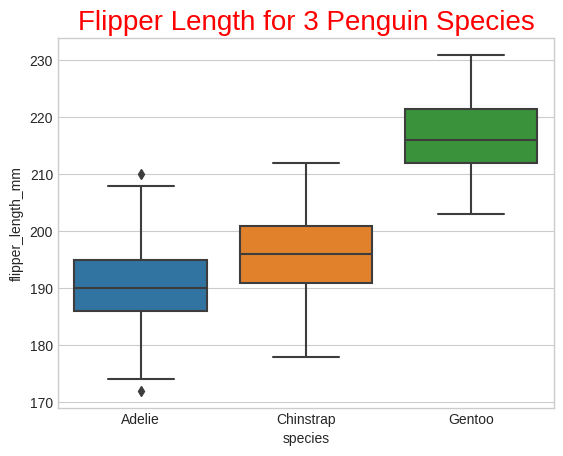

In [165]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

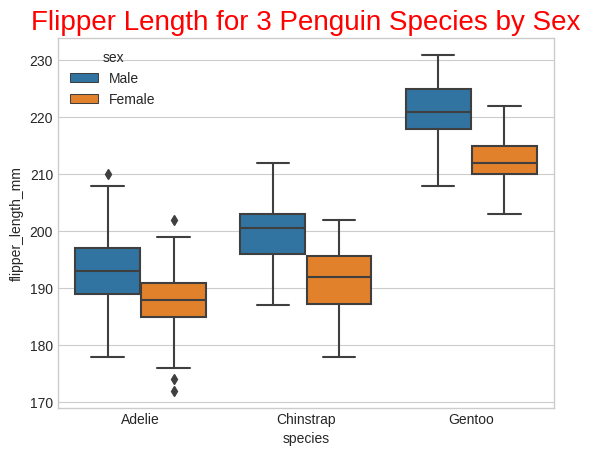

In [166]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

####Facet Plot

เป็น Class ที่ใช้ในการวาดกราฟย่อยๆ ตามระดับของข้อมูลที่กำหนด

[Seaborn Facet Plot](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

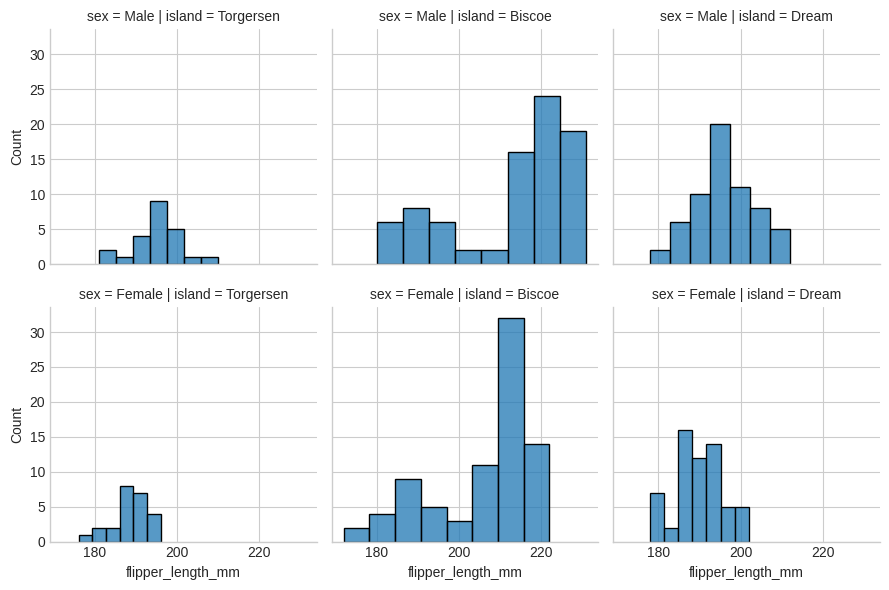

In [167]:
sns.FacetGrid(data, col="island", row="sex").map(sns.histplot, "flipper_length_mm")

####Pair Plot
เราสามารถใช้ pairplot เพื่อดูความสัมพันธ์ของคู่ตัวแปร ฟังก์ชันนี้สร้าง cross-plots สำหรับแต่ละตัวแปรตัวเลขในชุดข้อมูล

[Seaborn Pair Plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


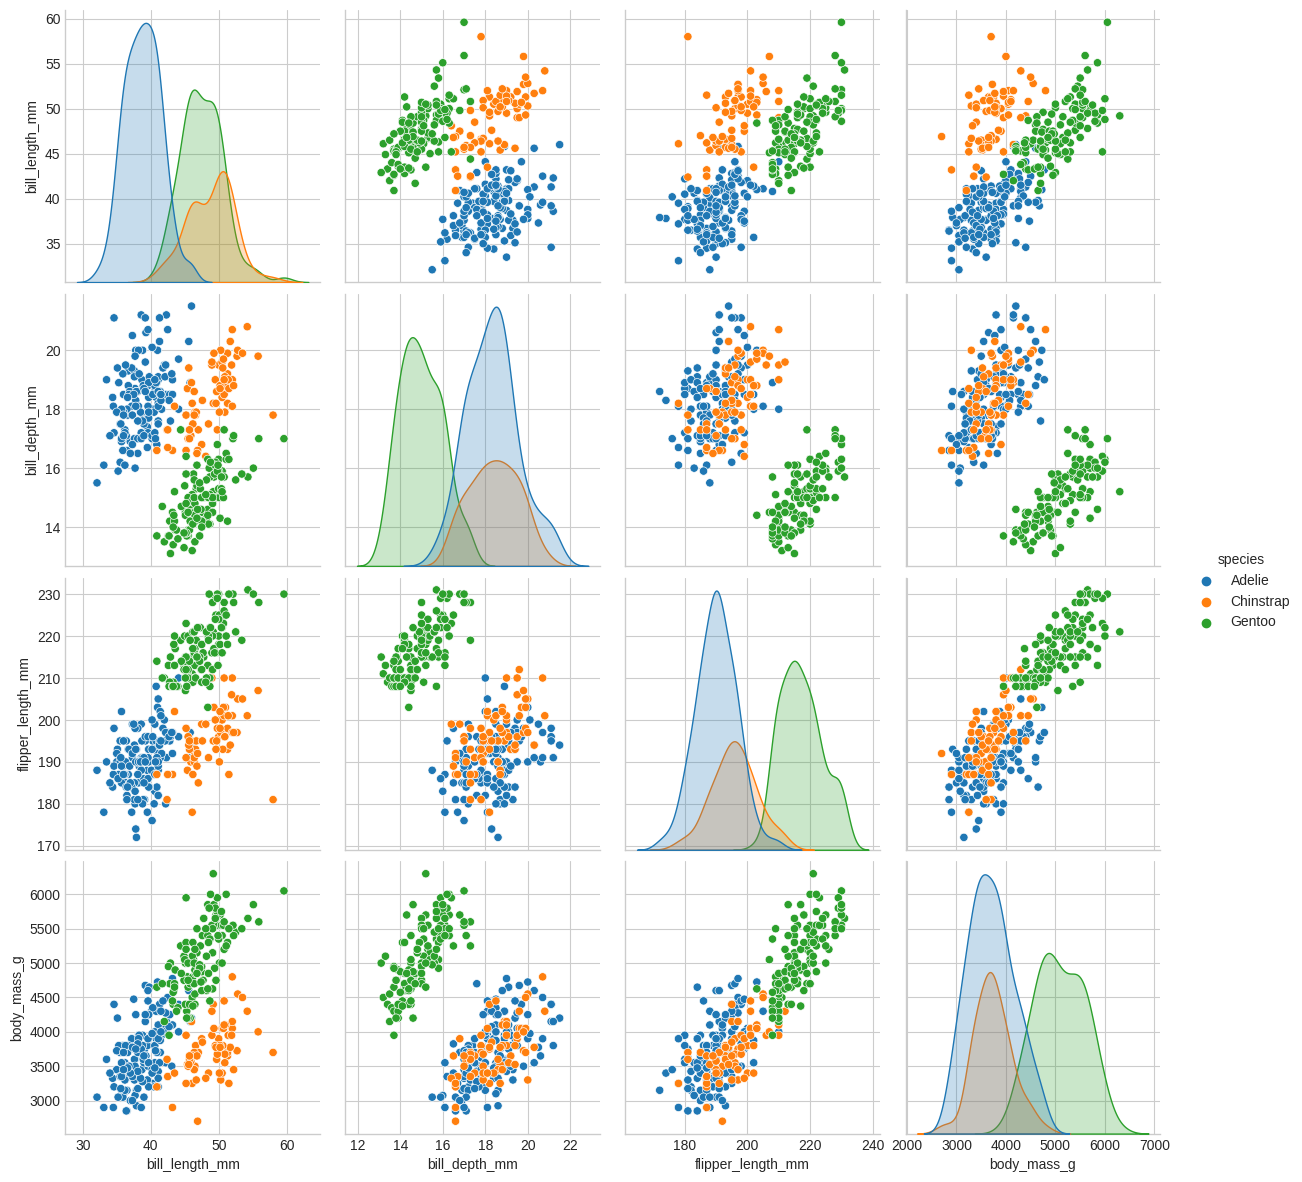

In [168]:
sns.pairplot(data, hue = "species", height=3)

#pairplot drop, island & sex due to object type

เราสามารถใช้พารามิเตอร์ `diag_kind` เพื่อสร้าง histogram บนแกนแทยง

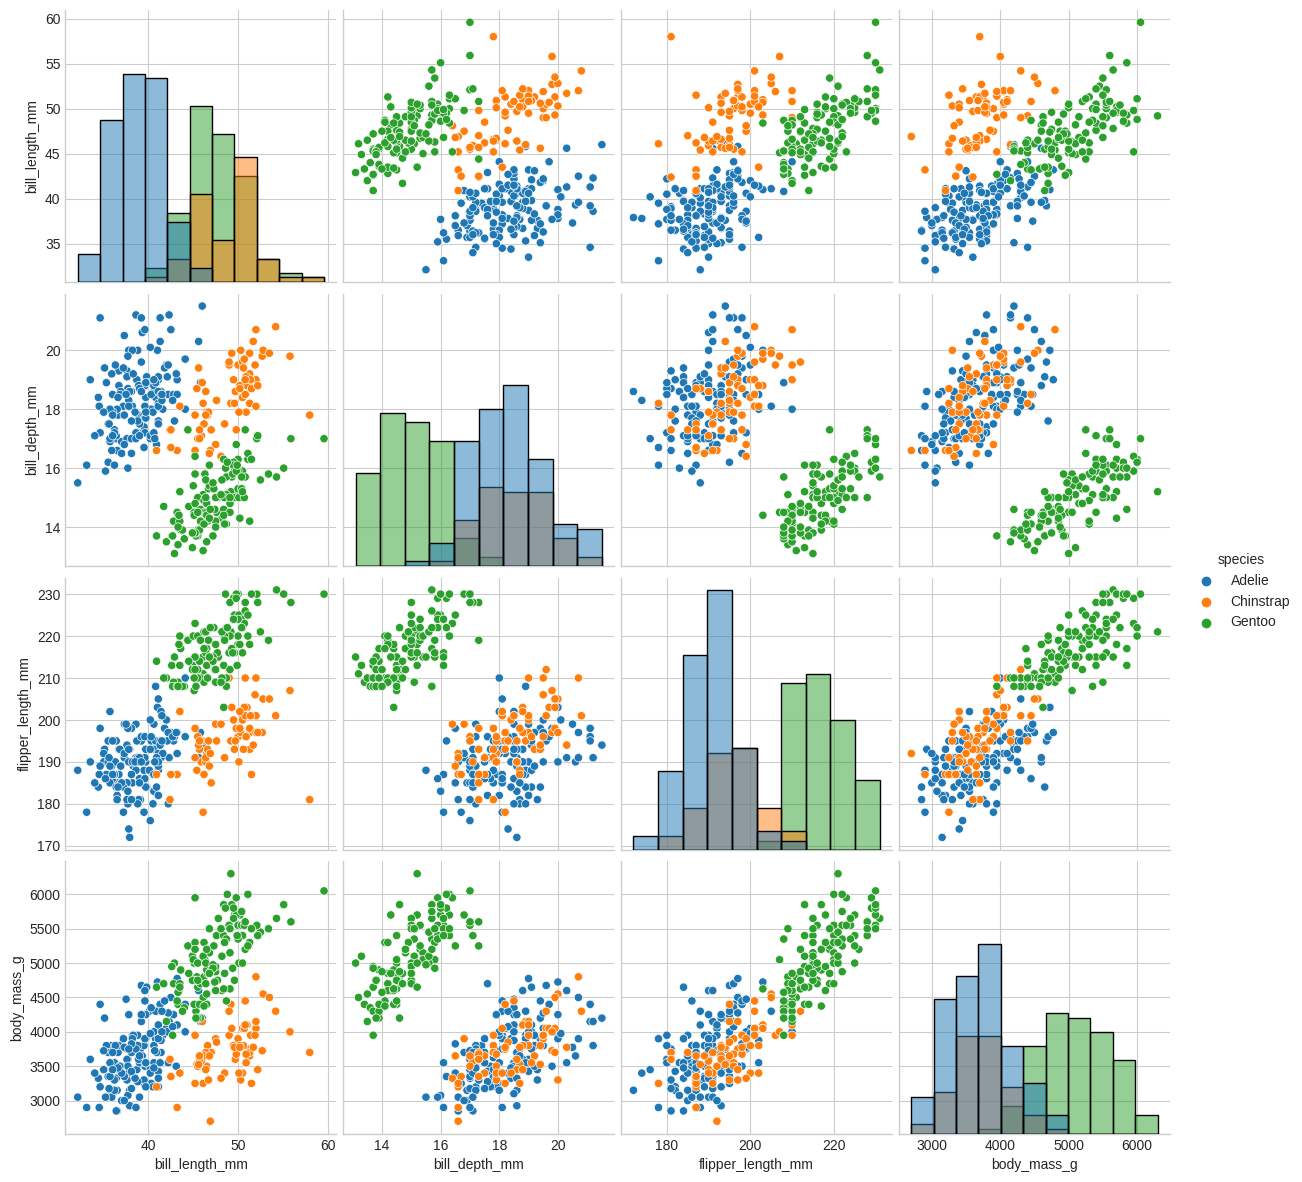

In [170]:
sns.pairplot(data, hue = "species", height=3, diag_kind="hist")

#### Heatmap

เราสามารถใช้ heatmap ในการแสดงความสัมพันธ์ของข้อมูล (correlations)

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<ipython-input-171-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

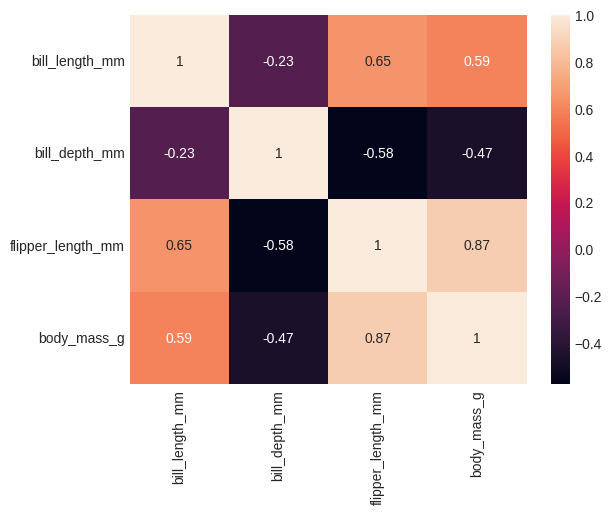

In [171]:
sns.heatmap(data.corr(), annot = True)

###แบบฝึกหัด 5.4

จากข้อมูล dataset Titanic เราสามารถวาดกราฟแบบใด และสรุปข้อมูลอะไรจากกราฟต่างๆได้บ้าง

In [172]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


อย่าลืม!!!  Clean Data ก่อนการใช้งาน